# Azure OpenAI benchmarks

This notebook is using the GitGub repo from Microsoft: https://github.com/Azure/azure-openai-benchmark

<img src="image (1).jpg" width=600>
<img src="image (2).jpg" width=600>
<img src="image (3).jpg" width=600>
<img src="image (4).jpg" width=600>

In [1]:
import datetime
import json
import openai
import os
import pandas as pd
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.graph_objects as go
import plotly.express as px
import shutil
import subprocess
import sweetviz as sv
import sys
import time

from plotly.subplots import make_subplots

In [3]:
print(f"Today is {str(datetime.datetime.today())}")

Today is 2024-06-18 10:22:07.558956


In [4]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [5]:
%%javascript Python 
OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

## 1. Settings

In [6]:
HOME = os.getcwd()
HOME

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks'

In [7]:
RESULTS_DIR = "results"

os.makedirs(RESULTS_DIR, exist_ok=True)

In [8]:
DIR_BENCHMARK = 'azure-openai-benchmark'

shutil.rmtree(DIR_BENCHMARK)

In [9]:
!git clone https://github.com/Azure/azure-openai-benchmark

Cloning into 'azure-openai-benchmark'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 224 (delta 129), reused 105 (delta 105), pack-reused 66
Receiving objects: 100% (224/224), 59.87 KiB | 89.00 KiB/s, done.
Resolving deltas: 100% (137/137), done.


In [10]:
os.chdir(DIR_BENCHMARK)

In [11]:
#!pip install -r requirements.txt

In [12]:
os.getcwd()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/azure-openai-benchmark'

### Models

In [13]:
# Your Azure OpenAI endpoint
MODEL_ENDPOINT = "TO BE REPLACED"

# Replace the value with your Azure OpenAI key
os.environ['OPENAI_API_KEY'] = "TO BE REPLACED"

In [14]:
# Models to compare. You can choose PayGO models or PTU deployed models
MODEL1 = "gpt-4o"
MODEL2 = "gpt-4-turbo-2024-04-09"

## 3. Syntax

In [15]:
!python -m benchmark.bench load --help

usage: bench.py load [-h] [-a API_VERSION] [-k API_KEY_ENV] [-c CLIENTS]
                     [-n REQUESTS] [-d DURATION] [-r RATE]
                     [-w AGGREGATION_WINDOW]
                     [-s {balanced,context,generation,custom}]
                     [-p CONTEXT_TOKENS] [-m MAX_TOKENS] [-i COMPLETIONS]
                     [--frequency-penalty FREQUENCY_PENALTY]
                     [--presence-penalty PRESENCE_PENALTY]
                     [--temperature TEMPERATURE] [--top-p TOP_P]
                     [-f {jsonl,human}] [-t {none,exponential}] -e DEPLOYMENT
                     api_base_endpoint

positional arguments:
  api_base_endpoint     Azure OpenAI deployment base endpoint.

optional arguments:
  -h, --help            show this help message and exit
  -a API_VERSION, --api-version API_VERSION
                        Set OpenAI API version.
  -k API_KEY_ENV, --api-key-env API_KEY_ENV
                        Environment variable that contains the API KEY.
  -c CLIENTS,

## 4. Quick test

In [16]:
MODEL1

'gpt-4o'

In [17]:
command = [
    'python', '-m', 'benchmark.bench', 'load', 
    '--deployment', MODEL1,  # Model to use
    '--rate', '10',  # RPM
    '--retry', 'exponential',  # Retry
    '--duration', '30',  # Duration in seconds
    MODEL_ENDPOINT  # Model endpoint to use
]

# Run the command
start = time.time()
now = datetime.datetime.today()
print(f"{now} Running benchmarks for model {MODEL1}...")
result = subprocess.run(command, capture_output=True, text=True)
elapsed = time.time() - start
print("Done")
print("Elapsed time: " + time.strftime(
    "%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)))

2024-06-18 10:23:07.107739 Running benchmarks for model gpt-4o...
Done
Elapsed time: 00:00:36.727545


In [18]:
print(result.stdout)

2024-06-18 10:23:09 rpm: n/a   processing: 2    completed: 0     failures: 0    throttled: 0    requests: 0     tpm: 0      ttft_avg: n/a    ttft_95th: n/a    tbt_avg: n/a    tbt_95th: n/a    e2e_avg: n/a    e2e_95th: n/a    util_avg: n/a    util_95th: n/a   
2024-06-18 10:23:10 rpm: n/a   processing: 2    completed: 0     failures: 0    throttled: 0    requests: 0     tpm: 0      ttft_avg: n/a    ttft_95th: n/a    tbt_avg: n/a    tbt_95th: n/a    e2e_avg: n/a    e2e_95th: n/a    util_avg: n/a    util_95th: n/a   
2024-06-18 10:23:11 rpm: n/a   processing: 2    completed: 0     failures: 0    throttled: 0    requests: 0     tpm: 0      ttft_avg: n/a    ttft_95th: n/a    tbt_avg: n/a    tbt_95th: n/a    e2e_avg: n/a    e2e_95th: n/a    util_avg: n/a    util_95th: n/a   
2024-06-18 10:23:12 rpm: n/a   processing: 2    completed: 0     failures: 0    throttled: 0    requests: 0     tpm: 0      ttft_avg: n/a    ttft_95th: n/a    tbt_avg: n/a    tbt_95th: n/a    e2e_avg: n/a    e2e_95th: n/

In [19]:
print(result.stderr)

2024-06-18 10:23:08 INFO     using shape profile balanced: context tokens: 500, max tokens: 500
2024-06-18 10:23:08 INFO     warming up prompt cache
2024-06-18 10:23:08 INFO     starting load...
2024-06-18 10:23:38 INFO     waiting for 6 requests to drain
2024-06-18 10:23:43 INFO     finished load test



## 5. Advanced testing

In [20]:
print(f"Benchmarks for model {MODEL1}")

Benchmarks for model gpt-4o


In [21]:
# With output file generation
OUTPUT_FILE = os.path.join(HOME, RESULTS_DIR, f"benchmarks_{MODEL1}.txt")

command = [
    'python', '-m', 'benchmark.bench', 'load',
    '--deployment', MODEL1,  # Model to use
    '--rate', '10',  # RPM
    '--duration', '300',  # Duration in seconds (should be > 30)
    '--output-format', 'human',  # Output format
    MODEL_ENDPOINT  # Model endpoint to use
]

# Running the benchmarks
start = time.time()
now = datetime.datetime.today()
print(f"{now} Running benchmarks for model {MODEL1}...")
result = subprocess.run(command, capture_output=True, text=True)
elapsed = time.time() - start

# Saving the results into a file
with open(OUTPUT_FILE, 'w') as f:
    f.write(result.stdout)

print(f"Benchmark output saved to file {OUTPUT_FILE}")
print("Elapsed time: " + time.strftime(
    "%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)))

2024-06-18 10:23:58.505162 Running benchmarks for model gpt-4o...
Benchmark output saved to file /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarks_gpt-4o.txt
Elapsed time: 00:05:07.723565


In [22]:
# Init
timestamps = []
rpm_values = []
processing_values = []
completed_values = []
failures_values = []
throttled_values = []
requests_values = []
tpm_values = []
ttft_avg_values = []
ttft_95th_values = []
tbt_avg_values = []
tbt_95th_values = []
e2e_avg_values = []
e2e_95th_values = []
util_avg_values = []
util_95th_values = []

# Reading file
with open(OUTPUT_FILE, 'r') as file:
    for line in file:
        fields = line.strip().split()
        timestamp = ' '.join(fields[0:2])
        timestamps.append(timestamp)
        rpm_values.append(fields[3])
        processing_values.append(fields[5])
        completed_values.append(fields[7])
        failures_values.append(fields[9])
        throttled_values.append(fields[11])
        requests_values.append(fields[13])
        tpm_values.append(fields[15])
        ttft_avg_values.append(fields[17])
        ttft_95th_values.append(fields[19])
        tbt_avg_values.append(fields[21])
        tbt_95th_values.append(fields[23])
        e2e_avg_values.append(fields[25])
        e2e_95th_values.append(fields[27])
        util_avg_values.append(fields[29])
        util_95th_values.append(fields[31])

df1 = pd.DataFrame({
    'timestamp': timestamps,
    'rpm': rpm_values,
    'processing': processing_values,
    'completed': completed_values,
    'failures': failures_values,
    'throttled': throttled_values,
    'requests': requests_values,
    'tpm': tpm_values,
    'ttft_avg': ttft_avg_values,
    'ttft_95th': ttft_95th_values,
    'tbt_avg': tbt_avg_values,
    'tbt_95th': tbt_95th_values,
    'e2e_avg': e2e_avg_values,
    'e2e_95th': e2e_95th_values,
    'util_avg': util_avg_values,
    'util_95th': util_95th_values
})

df1 = df1.replace('n/a', 0)
df1['rpm'] = df1['rpm'].astype(float)
df1['processing'] = df1['processing'].astype(int)
df1['completed'] = df1['completed'].astype(int)
df1['failures'] = df1['failures'].astype(int)
df1['throttled'] = df1['throttled'].astype(int)
df1['requests'] = df1['requests'].astype(int)
df1['tpm'] = df1['tpm'].astype(float)
df1['ttft_avg'] = df1['ttft_avg'].astype(float)
df1['ttft_95th'] = df1['ttft_95th'].astype(float)
df1['tbt_avg'] = df1['tbt_avg'].astype(float)
df1['tbt_95th'] = df1['tbt_95th'].astype(float)
df1['e2e_avg'] = df1['e2e_avg'].astype(float)
df1['e2e_95th'] = df1['e2e_95th'].astype(float)
df1['e2e_95th'] = df1['e2e_95th'].astype(float)
df1['model'] = MODEL1

In [23]:
df1

timestamp  rpm  processing  completed  failures  throttled  \
0    2024-06-18 10:24:00  0.0           2          0         0          0   
1    2024-06-18 10:24:01  0.0           2          0         0          0   
2    2024-06-18 10:24:02  0.0           2          0         0          0   
3    2024-06-18 10:24:03  0.0           2          0         0          0   
4    2024-06-18 10:24:04  0.0           2          0         0          0   
..                   ...  ...         ...        ...       ...        ...   
301  2024-06-18 10:29:02  8.0           1         45         0          0   
302  2024-06-18 10:29:03  8.0           1         45         0          0   
303  2024-06-18 10:29:04  8.0           1         45         0          0   
304  2024-06-18 10:29:05  7.0           1         45         0          0   
305  2024-06-18 10:29:06  8.0           0         46         0          0   

     requests     tpm  ttft_avg  ttft_95th  tbt_avg  tbt_95th  e2e_avg  \
0           0     0.0     0.000      0.000    0.000     0.000    0.000   
1           0     0.0     0.000      0.000    0.000     0.000    0.000   
2           0     0.0     0.000      0.000    0.000     0.000    0.000   
3           0     0.0     0.000      0.000    0.000     0.000    0.000   
4           0     0.0     0.000      0.000    0.000     0.000    0.000   
..        ...     ...       ...        ...      ...       ...      ...   
301        45  8032.0     0.188      0.351    0.011     0.011    5.429   
302        45  8032.0     0.188      0.351    0.011     0.011    5.429   
303        45  8032.0     0.188      0.351    0.011     0.011    5.429   
304        45  7028.0     0.179      0.332    0.010     0.011    5.429   
305        46  8032.0     0.174      0.320    0.011     0.012    5.444   

     e2e_95th  util_avg  util_95th   model  
0       0.000         0          0  gpt-4o  
1       0.000         0          0  gpt-4o  
2       0.000         0          0  gpt-4o  
3       0.000         0          0  gpt-4o  
4       0.000         0          0  gpt-4o  
..        ...       ...        ...     ...  
301     5.868         0          0  gpt-4o  
302     5.868         0          0  gpt-4o  
303     5.868         0          0  gpt-4o  
304     5.868         0          0  gpt-4o  
305     5.902         0          0  gpt-4o  

[306 rows x 17 columns]

In [24]:
df1.describe()

rpm  processing   completed  failures  throttled    requests  \
count  306.000000  306.000000  306.000000     306.0      306.0  306.000000   
mean     8.497712    0.830065   23.169935       0.0        0.0   23.169935   
std      1.682200    0.528417   13.234228       0.0        0.0   13.234228   
min      0.000000    0.000000    0.000000       0.0        0.0    0.000000   
25%      8.000000    1.000000   12.000000       0.0        0.0   12.000000   
50%      8.000000    1.000000   23.000000       0.0        0.0   23.000000   
75%      9.000000    1.000000   34.000000       0.0        0.0   34.000000   
max     20.000000    2.000000   46.000000       0.0        0.0   46.000000   

                tpm    ttft_avg   ttft_95th     tbt_avg    tbt_95th  \
count    306.000000  306.000000  306.000000  306.000000  306.000000   
mean    8532.284314    0.169673    0.275248    0.010062    0.010676   
std     1690.901182    0.036663    0.071753    0.001364    0.001425   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%     8032.000000    0.145000    0.216000    0.010000    0.011000   
50%     8032.000000    0.173000    0.300000    0.010000    0.011000   
75%     9036.000000    0.192000    0.332000    0.010000    0.011000   
max    20080.000000    0.271000    0.351000    0.011000    0.012000   

          e2e_avg    e2e_95th  util_avg  util_95th  
count  306.000000  306.000000     306.0      306.0  
mean     5.319761    5.649895       0.0        0.0  
std      0.687221    0.738355       0.0        0.0  
min      0.000000    0.000000       0.0        0.0  
25%      5.394000    5.645000       0.0        0.0  
50%      5.402000    5.791000       0.0        0.0  
75%      5.424000    5.816000       0.0        0.0  
max      5.524000    5.902000       0.0        0.0

In [25]:
cols_to_plot = [
    "rpm", "failures", "tpm", "ttft_avg", "ttft_95th", "tbt_avg", "tbt_95th",
    "e2e_avg", "e2e_95th"
]

In [26]:
for col in cols_to_plot:
    fig = px.line(df1,
                  x=df1.index,
                  y=df1[col],
                  title=f'{col} for model {MODEL1}')
    fig.show()

In [27]:
for col in cols_to_plot:
    fig = px.box(df1, y=df1[col], title=f'{col} for model {MODEL1}')
    fig.show()

## 6. Comparing benchmarks

### Running benchmarks from the second model

In [28]:
print(f"Benchmarks for model {MODEL2}")

Benchmarks for model gpt-4-turbo-2024-04-09


In [29]:
# With output file generation
OUTPUT_FILE = os.path.join(HOME, RESULTS_DIR, f"benchmarks_{MODEL2}.txt")

command = [
    'python', '-m', 'benchmark.bench', 'load',
    '--deployment', MODEL2,  # Model to use
    '--rate', '10',  # RPM
    '--duration', '300',  # Duration in seconds (should be > 30)
    '--output-format', 'human',  # Output format
    MODEL_ENDPOINT  # Model endpoint to use
]

# Running the benchmarks
start = time.time()
now = datetime.datetime.today()
print(f"{now} Running benchmarks for model {MODEL2}...")
result = subprocess.run(command, capture_output=True, text=True)
elapsed = time.time() - start

# Saving the results into a file
with open(OUTPUT_FILE, 'w') as f:
    f.write(result.stdout)

print(f"Benchmark output saved to file {OUTPUT_FILE}")
print("Elapsed time: " + time.strftime(
    "%H:%M:%S.{}".format(str(elapsed % 1)[2:])[:15], time.gmtime(elapsed)))

2024-06-18 10:29:17.032105 Running benchmarks for model gpt-4-turbo-2024-04-09...
Benchmark output saved to file /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarks_gpt-4-turbo-2024-04-09.txt
Elapsed time: 00:05:41.728342


In [30]:
# Init
timestamps = []
rpm_values = []
processing_values = []
completed_values = []
failures_values = []
throttled_values = []
requests_values = []
tpm_values = []
ttft_avg_values = []
ttft_95th_values = []
tbt_avg_values = []
tbt_95th_values = []
e2e_avg_values = []
e2e_95th_values = []
util_avg_values = []
util_95th_values = []

# Reading file
with open(OUTPUT_FILE, 'r') as file:
    for line in file:
        fields = line.strip().split()
        timestamp = ' '.join(fields[0:2])
        timestamps.append(timestamp)
        rpm_values.append(fields[3])
        processing_values.append(fields[5])
        completed_values.append(fields[7])
        failures_values.append(fields[9])
        throttled_values.append(fields[11])
        requests_values.append(fields[13])
        tpm_values.append(fields[15])
        ttft_avg_values.append(fields[17])
        ttft_95th_values.append(fields[19])
        tbt_avg_values.append(fields[21])
        tbt_95th_values.append(fields[23])
        e2e_avg_values.append(fields[25])
        e2e_95th_values.append(fields[27])
        util_avg_values.append(fields[29])
        util_95th_values.append(fields[31])

df2 = pd.DataFrame({
    'timestamp': timestamps,
    'rpm': rpm_values,
    'processing': processing_values,
    'completed': completed_values,
    'failures': failures_values,
    'throttled': throttled_values,
    'requests': requests_values,
    'tpm': tpm_values,
    'ttft_avg': ttft_avg_values,
    'ttft_95th': ttft_95th_values,
    'tbt_avg': tbt_avg_values,
    'tbt_95th': tbt_95th_values,
    'e2e_avg': e2e_avg_values,
    'e2e_95th': e2e_95th_values,
    'util_avg': util_avg_values,
    'util_95th': util_95th_values
})

df2 = df2.replace('n/a', 0)
df2['rpm'] = df2['rpm'].astype(float)
df2['processing'] = df2['processing'].astype(int)
df2['completed'] = df2['completed'].astype(int)
df2['failures'] = df2['failures'].astype(int)
df2['throttled'] = df2['throttled'].astype(int)
df2['requests'] = df2['requests'].astype(int)
df2['tpm'] = df2['tpm'].astype(float)
df2['ttft_avg'] = df2['ttft_avg'].astype(float)
df2['ttft_95th'] = df2['ttft_95th'].astype(float)
df2['tbt_avg'] = df2['tbt_avg'].astype(float)
df2['tbt_95th'] = df2['tbt_95th'].astype(float)
df2['e2e_avg'] = df2['e2e_avg'].astype(float)
df2['e2e_95th'] = df2['e2e_95th'].astype(float)
df2['e2e_95th'] = df2['e2e_95th'].astype(float)
df2['model'] = MODEL2

In [31]:
df2

timestamp  rpm  processing  completed  failures  throttled  \
0    2024-06-18 10:29:19  0.0           2          0         0          0   
1    2024-06-18 10:29:20  0.0           2          0         0          0   
2    2024-06-18 10:29:21  0.0           2          0         0          0   
3    2024-06-18 10:29:22  0.0           2          0         0          0   
4    2024-06-18 10:29:23  0.0           2          0         0          0   
..                   ...  ...         ...        ...       ...        ...   
335  2024-06-18 10:34:54  2.0           2         44         0          0   
336  2024-06-18 10:34:55  2.0           2         44         0          0   
337  2024-06-18 10:34:56  2.0           2         44         0          0   
338  2024-06-18 10:34:57  3.0           1         45         0          0   
339  2024-06-18 10:34:58  4.0           0         46         0          0   

     requests     tpm  ttft_avg  ttft_95th  tbt_avg  tbt_95th  e2e_avg  \
0           0     0.0     0.000      0.000    0.000     0.000    0.000   
1           0     0.0     0.000      0.000    0.000     0.000    0.000   
2           0     0.0     0.000      0.000    0.000     0.000    0.000   
3           0     0.0     0.000      0.000    0.000     0.000    0.000   
4           0     0.0     0.000      0.000    0.000     0.000    0.000   
..        ...     ...       ...        ...      ...       ...      ...   
335        44  2006.0     1.546      2.578    0.087     0.100   36.319   
336        44  2006.0     1.546      2.578    0.087     0.100   36.319   
337        44  2006.0     1.546      2.578    0.087     0.100   36.319   
338        45  3009.0     1.159      2.463    0.084     0.099   36.375   
339        46  4012.0     0.961      2.348    0.086     0.100   36.622   

     e2e_95th  util_avg  util_95th                   model  
0       0.000         0          0  gpt-4-turbo-2024-04-09  
1       0.000         0          0  gpt-4-turbo-2024-04-09  
2       0.000         0          0  gpt-4-turbo-2024-04-09  
3       0.000         0          0  gpt-4-turbo-2024-04-09  
4       0.000         0          0  gpt-4-turbo-2024-04-09  
..        ...       ...        ...                     ...  
335    53.308         0          0  gpt-4-turbo-2024-04-09  
336    53.308         0          0  gpt-4-turbo-2024-04-09  
337    53.308         0          0  gpt-4-turbo-2024-04-09  
338    53.204         0          0  gpt-4-turbo-2024-04-09  
339    53.100         0          0  gpt-4-turbo-2024-04-09  

[340 rows x 17 columns]

In [32]:
df2.describe()

rpm  processing   completed  failures  throttled    requests  \
count  340.000000  340.000000  340.000000     340.0      340.0  340.000000   
mean     3.575882    4.955882   21.244118       0.0        0.0   21.244118   
std      1.527006    1.147446   14.359351       0.0        0.0   14.359351   
min      0.000000    0.000000    0.000000       0.0        0.0    0.000000   
25%      3.000000    4.000000    8.000000       0.0        0.0    8.000000   
50%      4.000000    5.000000   22.000000       0.0        0.0   22.000000   
75%      5.000000    6.000000   34.000000       0.0        0.0   34.000000   
max      7.000000    7.000000   46.000000       0.0        0.0   46.000000   

               tpm    ttft_avg   ttft_95th     tbt_avg    tbt_95th  \
count   340.000000  340.000000  340.000000  340.000000  340.000000   
mean   3586.320588    0.566959    0.895688    0.063112    0.072471   
std    1531.809180    0.292369    0.724235    0.019854    0.030956   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%    3009.000000    0.444000    0.487000    0.064000    0.073000   
50%    4012.000000    0.505000    0.657000    0.069000    0.077000   
75%    5015.000000    0.658000    1.176250    0.072000    0.094000   
max    7021.000000    1.546000    2.616000    0.087000    0.103000   

          e2e_avg    e2e_95th  util_avg  util_95th  
count  340.000000  340.000000     340.0      340.0  
mean    32.968671   43.574929       0.0        0.0  
std     10.099110   17.743701       0.0        0.0  
min      0.000000    0.000000       0.0        0.0  
25%     35.814000   44.895000       0.0        0.0  
50%     36.065000   51.350000       0.0        0.0  
75%     36.504000   52.734000       0.0        0.0  
max     38.487000   54.437000       0.0        0.0

In [33]:
for col in cols_to_plot:
    fig = px.line(df2,
                  x=df2.index,
                  y=df2[col],
                  title=f'{col} for model {MODEL2}')
    fig.show()

In [34]:
for col in cols_to_plot:
    fig = px.box(df2, y=df2[col], title=f'{col} for model {MODEL2}')
    fig.show()

### Benchmarks comparison results

In [37]:
df1.shape

(306, 17)

In [38]:
df2.shape

(340, 17)

In [35]:
df1.describe()

rpm  processing   completed  failures  throttled    requests  \
count  306.000000  306.000000  306.000000     306.0      306.0  306.000000   
mean     8.497712    0.830065   23.169935       0.0        0.0   23.169935   
std      1.682200    0.528417   13.234228       0.0        0.0   13.234228   
min      0.000000    0.000000    0.000000       0.0        0.0    0.000000   
25%      8.000000    1.000000   12.000000       0.0        0.0   12.000000   
50%      8.000000    1.000000   23.000000       0.0        0.0   23.000000   
75%      9.000000    1.000000   34.000000       0.0        0.0   34.000000   
max     20.000000    2.000000   46.000000       0.0        0.0   46.000000   

                tpm    ttft_avg   ttft_95th     tbt_avg    tbt_95th  \
count    306.000000  306.000000  306.000000  306.000000  306.000000   
mean    8532.284314    0.169673    0.275248    0.010062    0.010676   
std     1690.901182    0.036663    0.071753    0.001364    0.001425   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%     8032.000000    0.145000    0.216000    0.010000    0.011000   
50%     8032.000000    0.173000    0.300000    0.010000    0.011000   
75%     9036.000000    0.192000    0.332000    0.010000    0.011000   
max    20080.000000    0.271000    0.351000    0.011000    0.012000   

          e2e_avg    e2e_95th  util_avg  util_95th  
count  306.000000  306.000000     306.0      306.0  
mean     5.319761    5.649895       0.0        0.0  
std      0.687221    0.738355       0.0        0.0  
min      0.000000    0.000000       0.0        0.0  
25%      5.394000    5.645000       0.0        0.0  
50%      5.402000    5.791000       0.0        0.0  
75%      5.424000    5.816000       0.0        0.0  
max      5.524000    5.902000       0.0        0.0

In [36]:
df2.describe()

rpm  processing   completed  failures  throttled    requests  \
count  340.000000  340.000000  340.000000     340.0      340.0  340.000000   
mean     3.575882    4.955882   21.244118       0.0        0.0   21.244118   
std      1.527006    1.147446   14.359351       0.0        0.0   14.359351   
min      0.000000    0.000000    0.000000       0.0        0.0    0.000000   
25%      3.000000    4.000000    8.000000       0.0        0.0    8.000000   
50%      4.000000    5.000000   22.000000       0.0        0.0   22.000000   
75%      5.000000    6.000000   34.000000       0.0        0.0   34.000000   
max      7.000000    7.000000   46.000000       0.0        0.0   46.000000   

               tpm    ttft_avg   ttft_95th     tbt_avg    tbt_95th  \
count   340.000000  340.000000  340.000000  340.000000  340.000000   
mean   3586.320588    0.566959    0.895688    0.063112    0.072471   
std    1531.809180    0.292369    0.724235    0.019854    0.030956   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%    3009.000000    0.444000    0.487000    0.064000    0.073000   
50%    4012.000000    0.505000    0.657000    0.069000    0.077000   
75%    5015.000000    0.658000    1.176250    0.072000    0.094000   
max    7021.000000    1.546000    2.616000    0.087000    0.103000   

          e2e_avg    e2e_95th  util_avg  util_95th  
count  340.000000  340.000000     340.0      340.0  
mean    32.968671   43.574929       0.0        0.0  
std     10.099110   17.743701       0.0        0.0  
min      0.000000    0.000000       0.0        0.0  
25%     35.814000   44.895000       0.0        0.0  
50%     36.065000   51.350000       0.0        0.0  
75%     36.504000   52.734000       0.0        0.0  
max     38.487000   54.437000       0.0        0.0

In [39]:
df1['source'] = 'df1'
df2['source'] = 'df2'

In [40]:
for col in cols_to_plot:
    combined_df = pd.concat([df1[[col, 'source']], df2[[col, 'source']]])
    fig = px.box(combined_df, x="source", y=col, color='source',
                 title=f"{col} boxplots",
                 color_discrete_map={"df1": "blue", "df2": "green"})
    fig.update_xaxes(title_text="Models", tickvals=[
                     'df1', 'df2'], ticktext=[f"{MODEL1}", f"{MODEL2}"])
    fig.update_layout(showlegend=False)
    fig.show()

### Excel exports

In [41]:
df1.to_excel(os.path.join(HOME, RESULTS_DIR, f"benchmarks{MODEL1}.xlsx"))

In [42]:
df2.to_excel(os.path.join(HOME, RESULTS_DIR, f"benchmarks{MODEL2}.xlsx"))

## 7. EDA with sweetviz (optional)

In [43]:
HTML_FILE1 = os.path.join(HOME, RESULTS_DIR, f"benchmarks{MODEL1}.html")

In [44]:
report1 = sv.analyze(df1)
report1.show_html(HTML_FILE1, open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarksgpt-4o.html was generated.



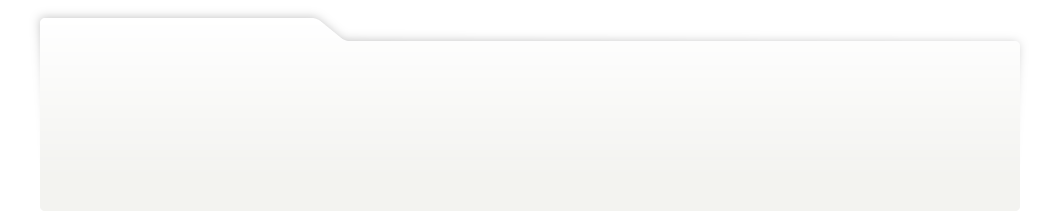
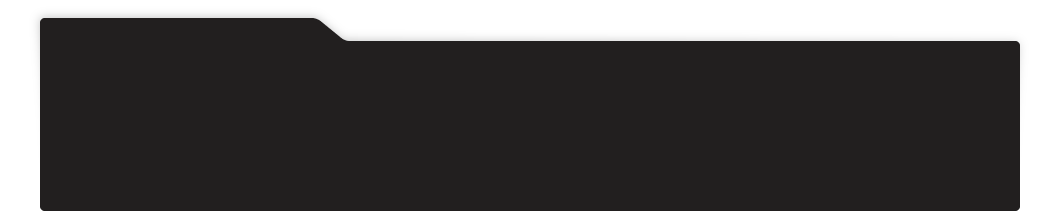
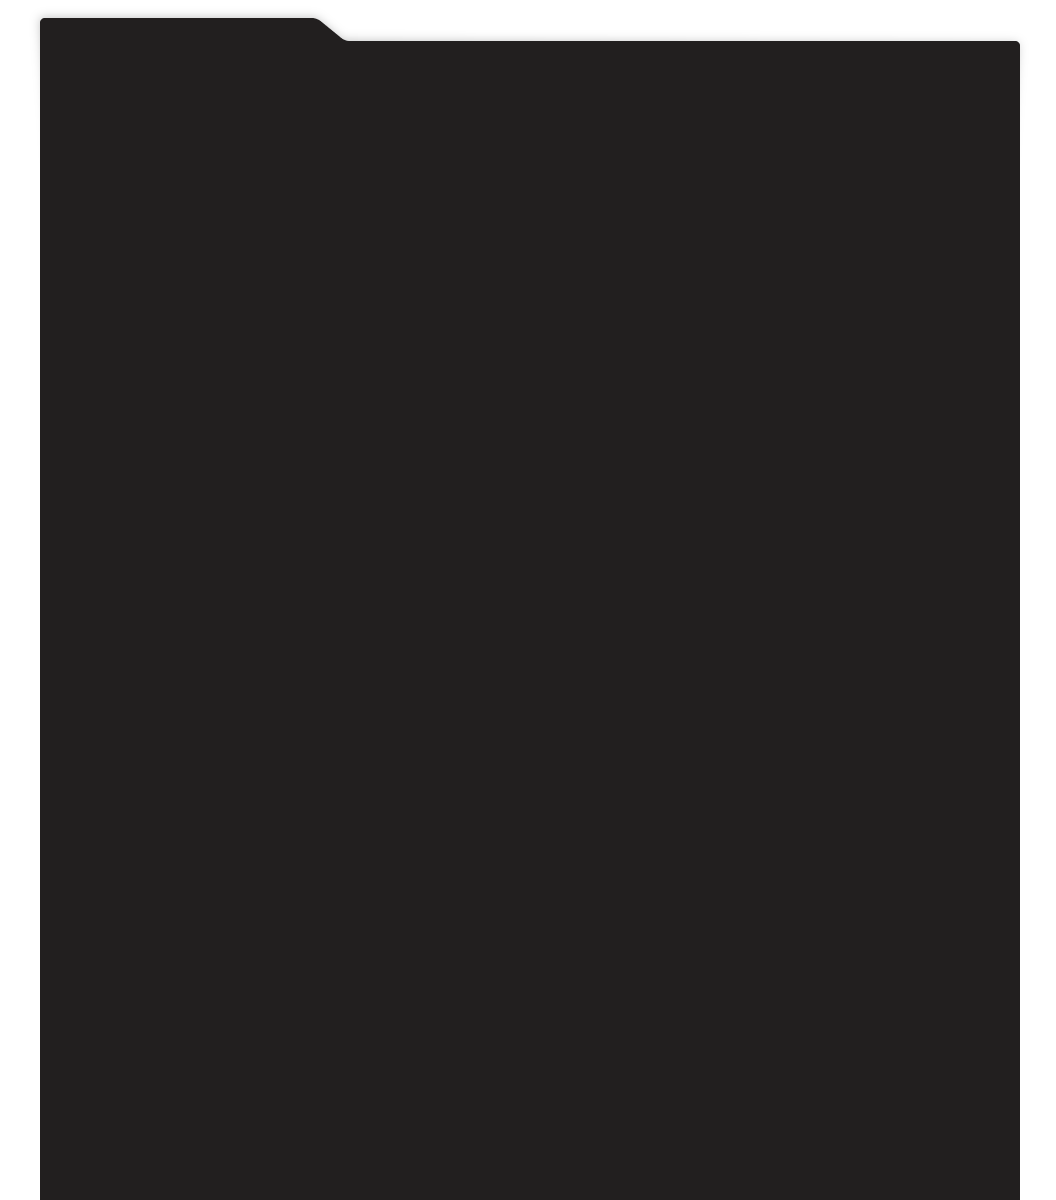
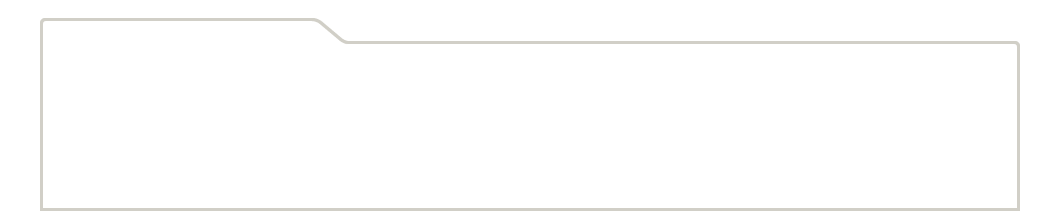
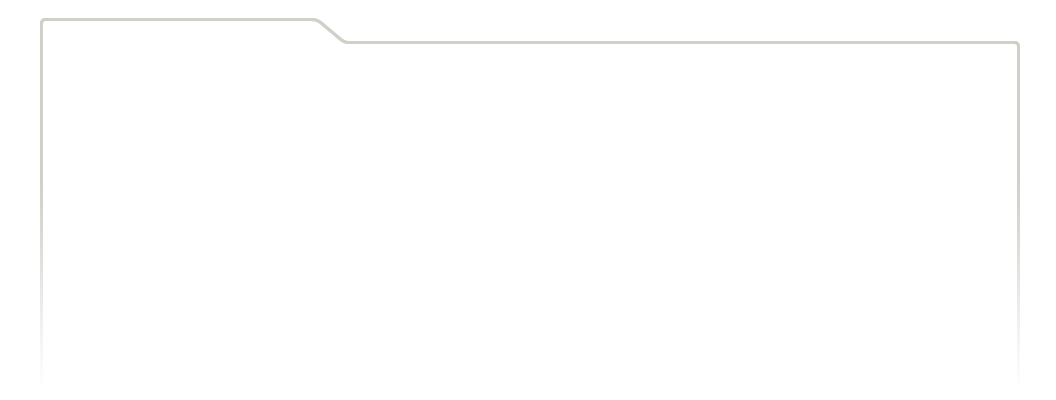
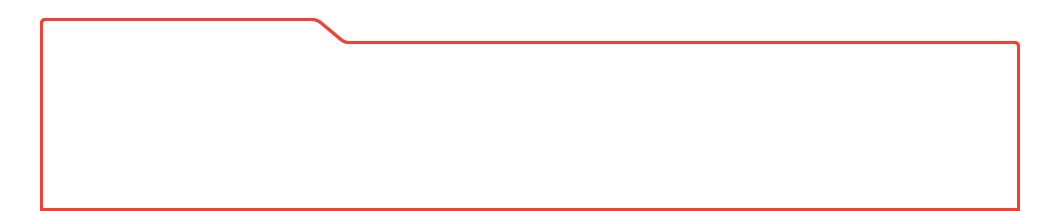
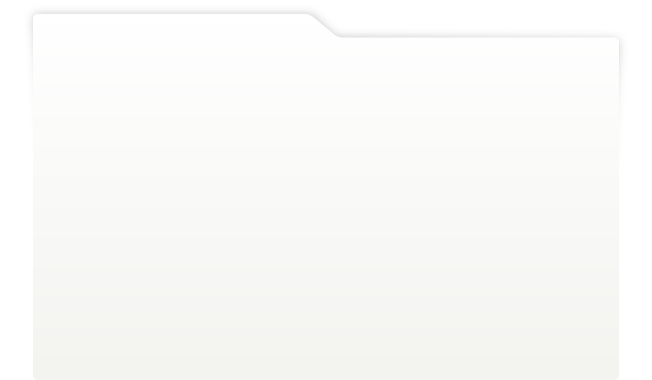
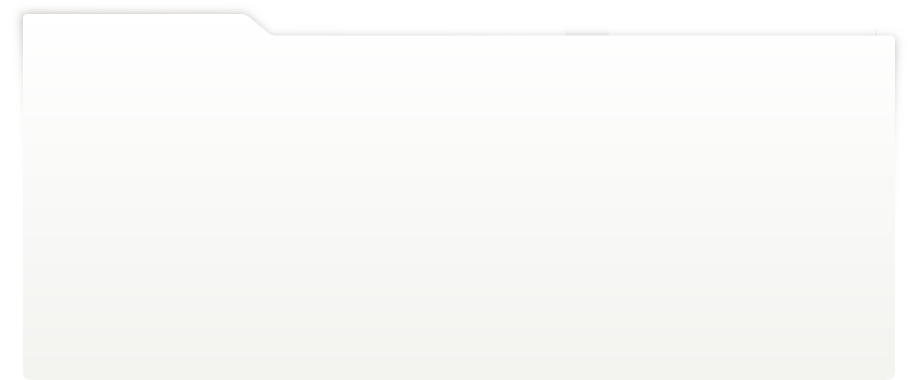
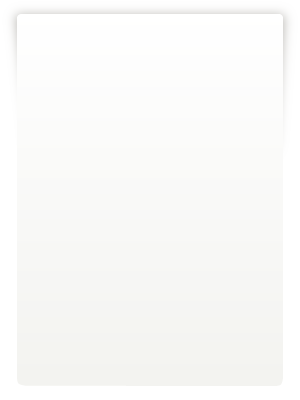
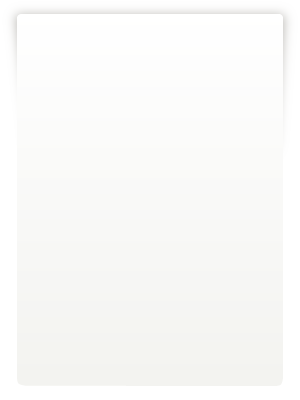
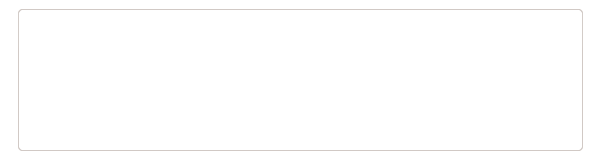
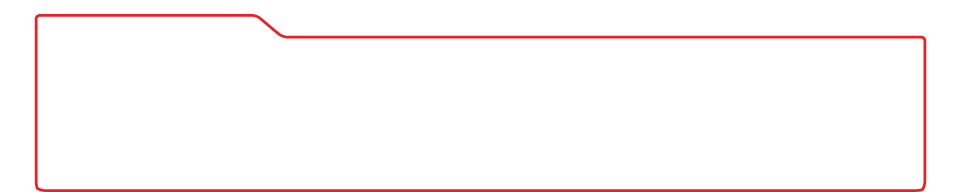
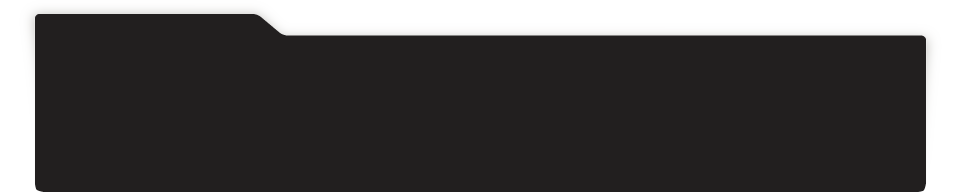
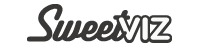
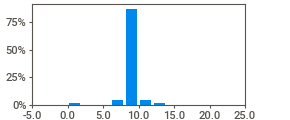
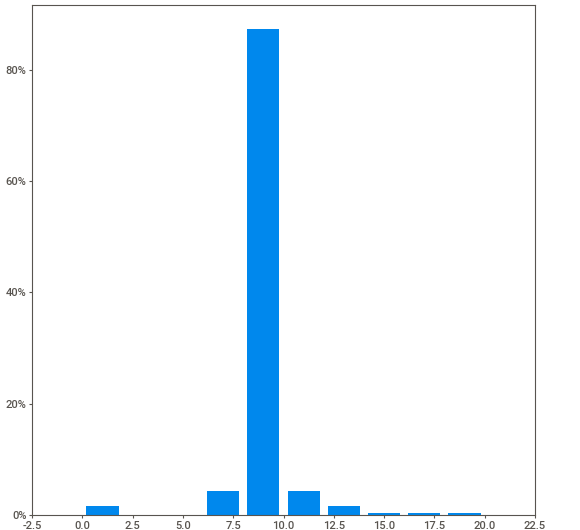
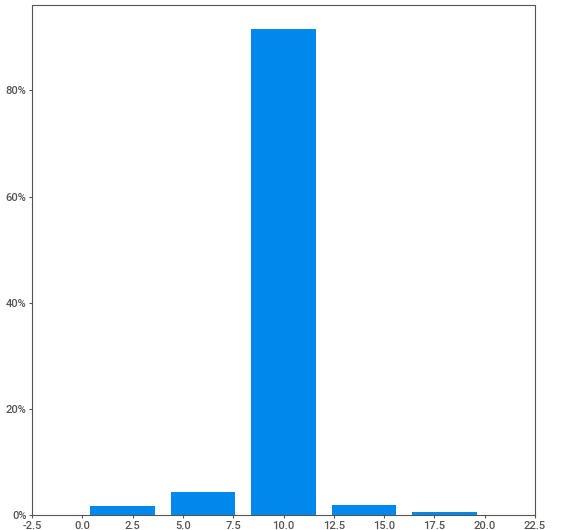
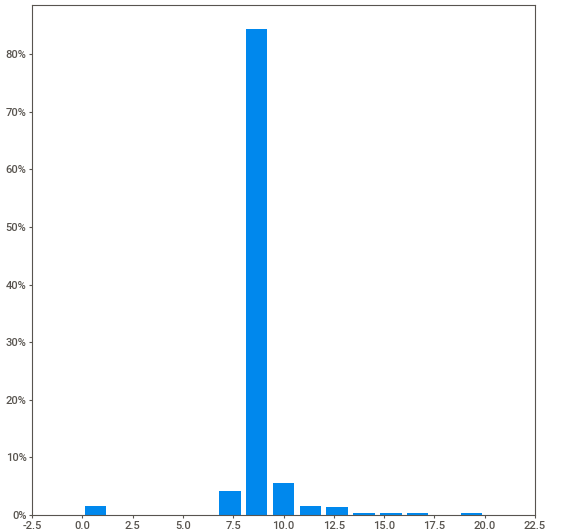
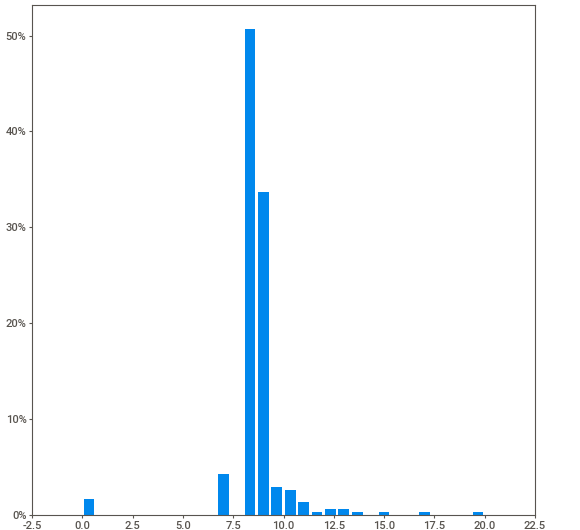
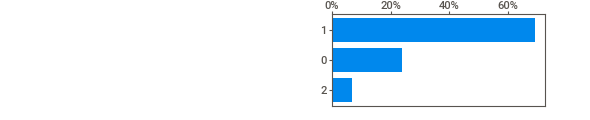
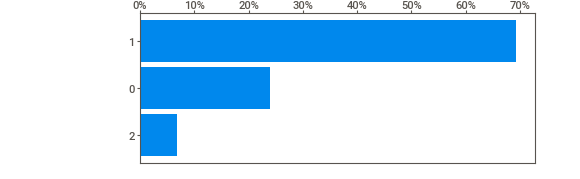
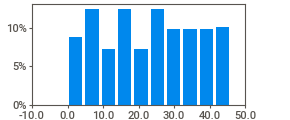
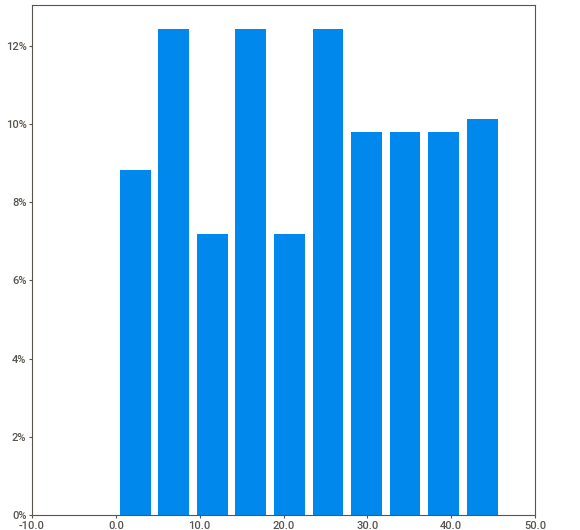
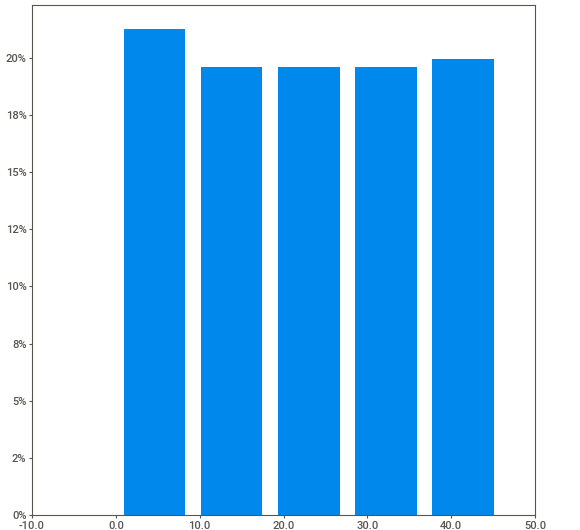
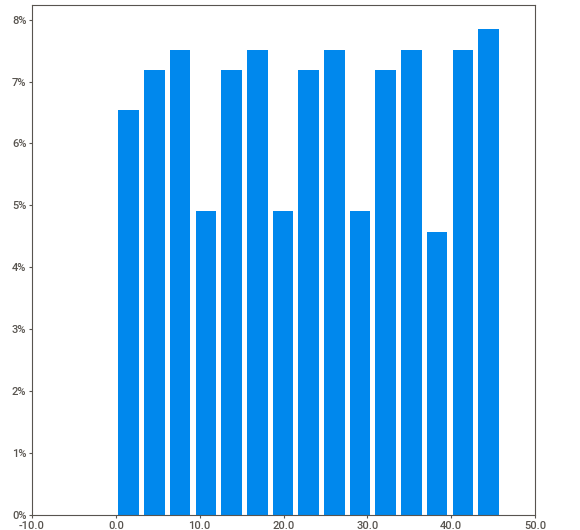
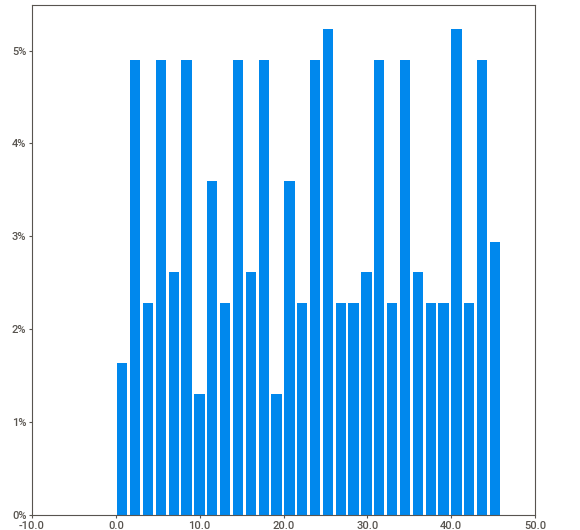
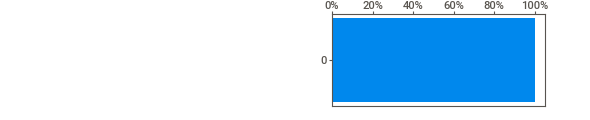
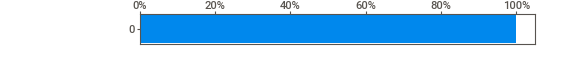
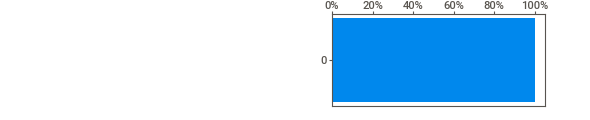
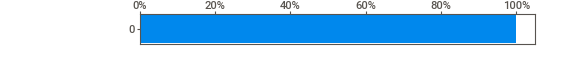
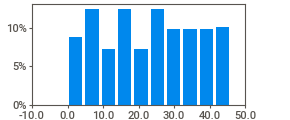
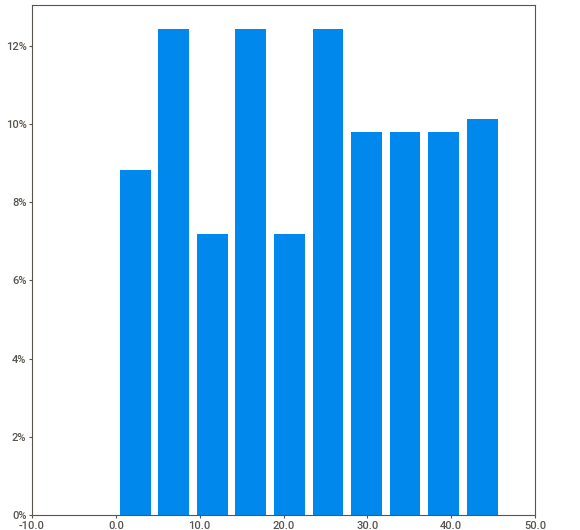
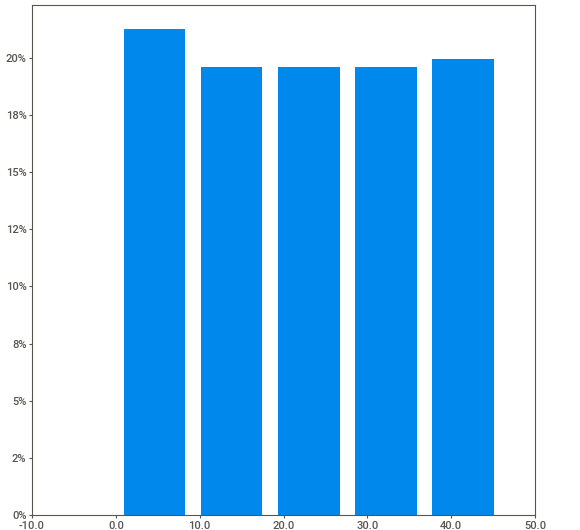
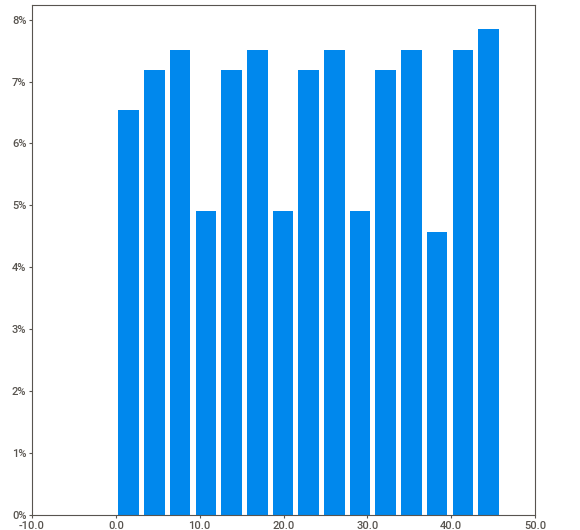
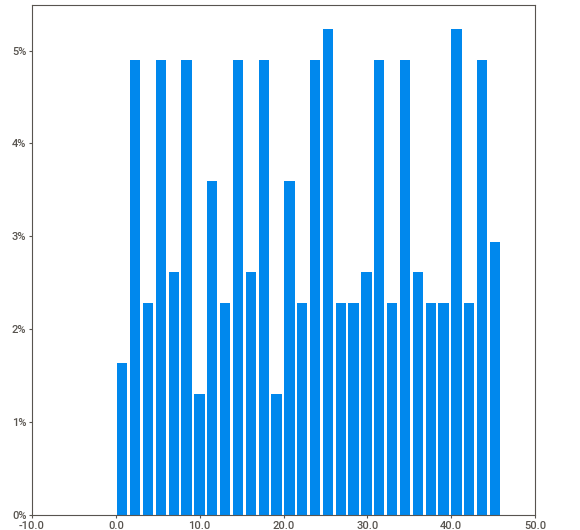
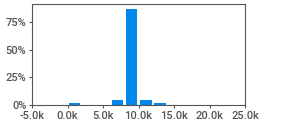
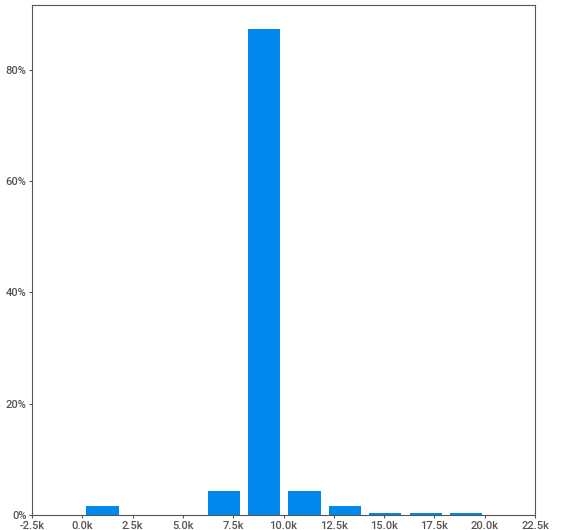
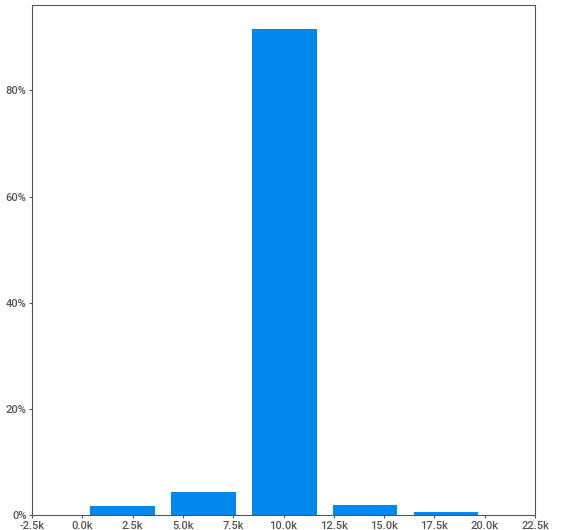
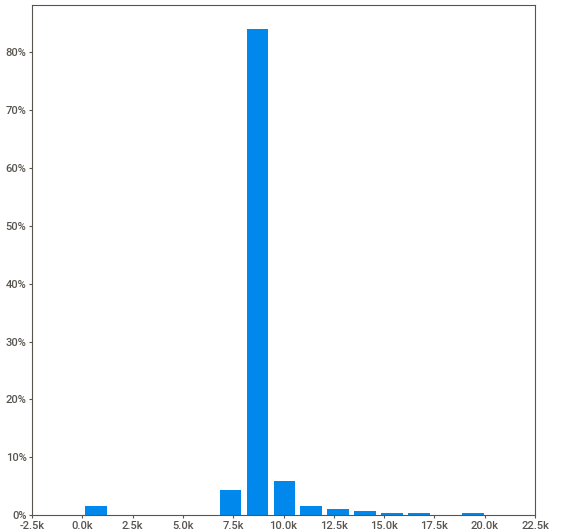
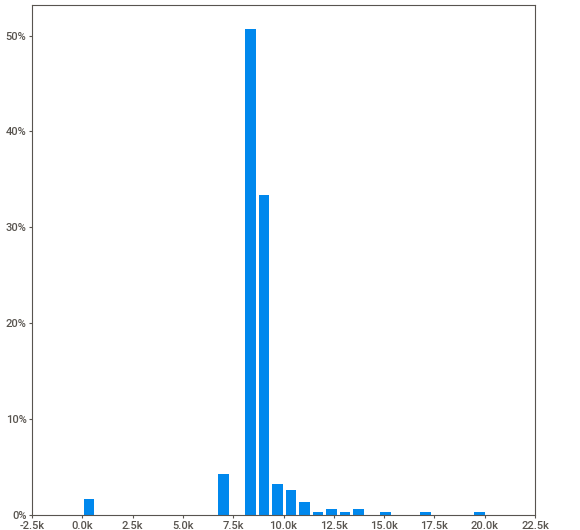
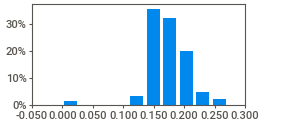
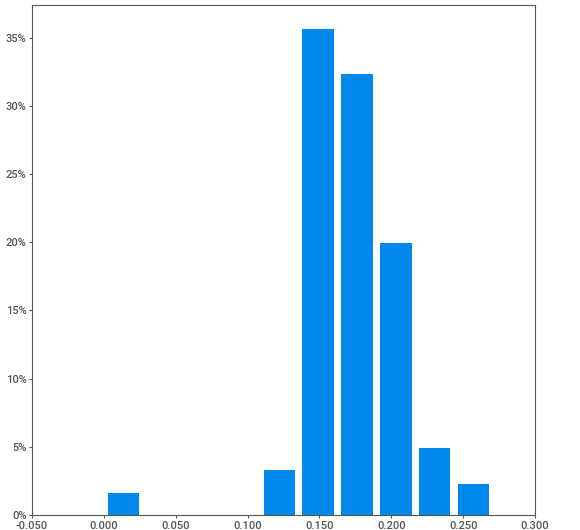
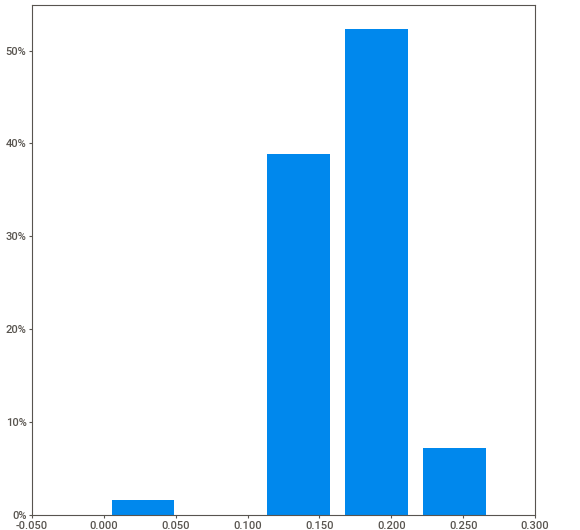
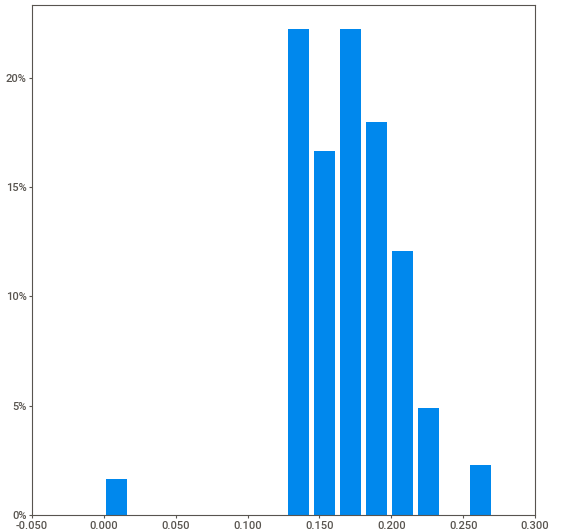
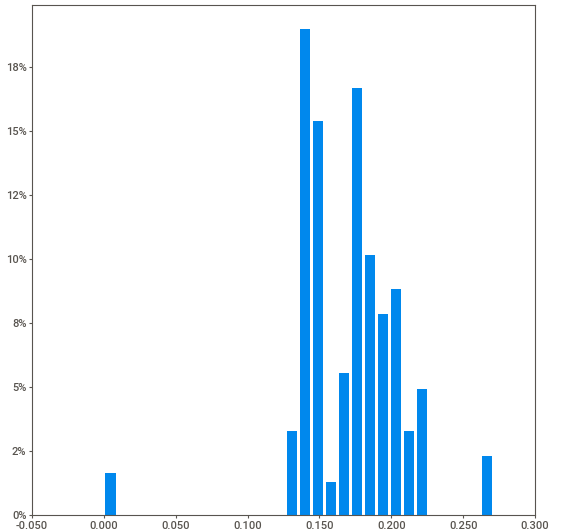
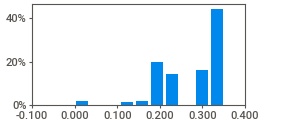
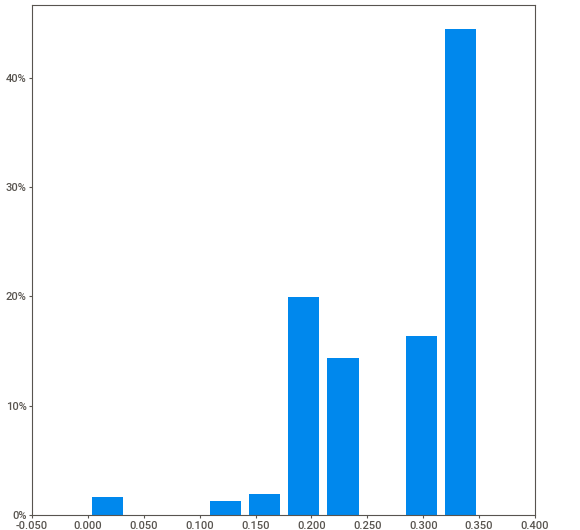
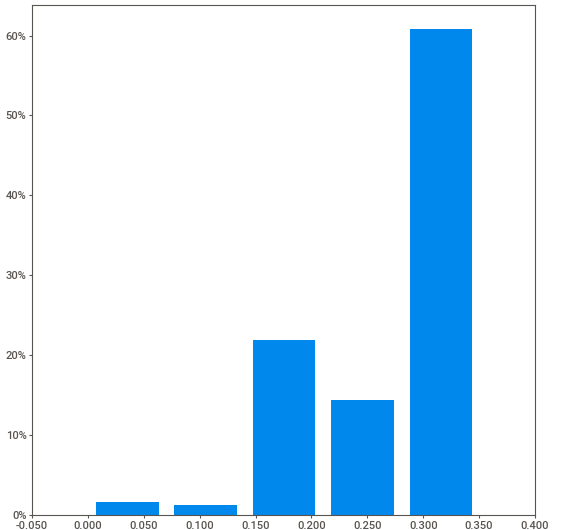
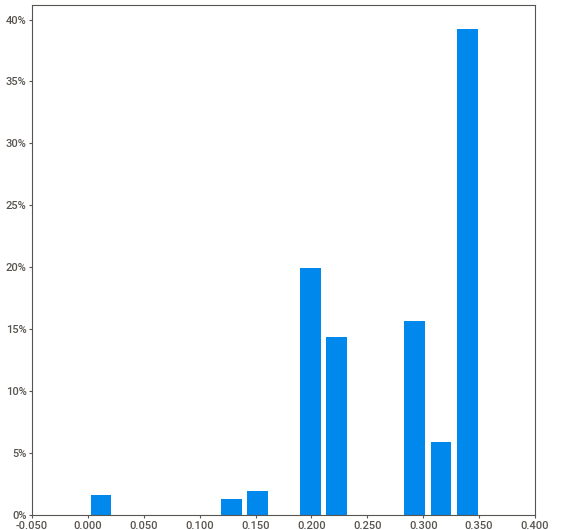
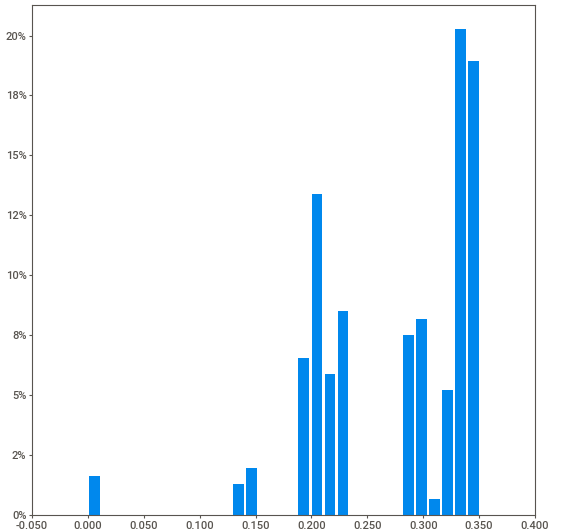
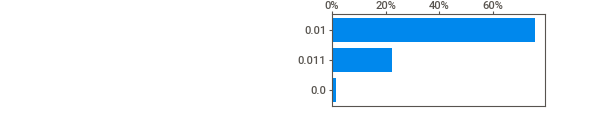
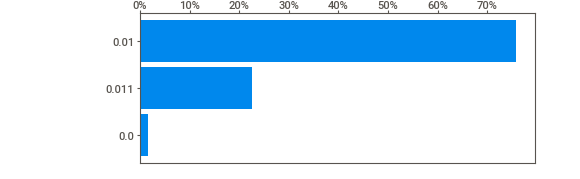
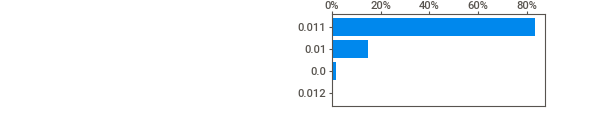
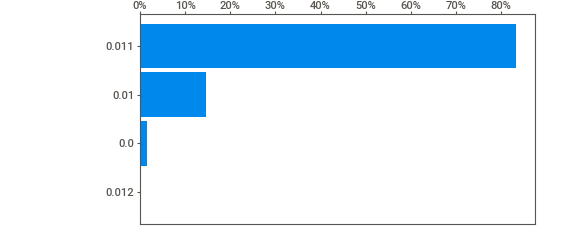
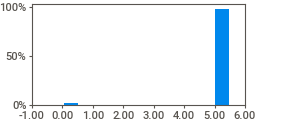
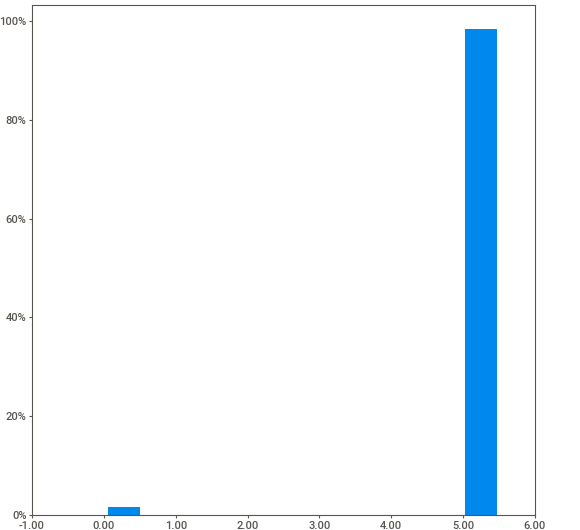
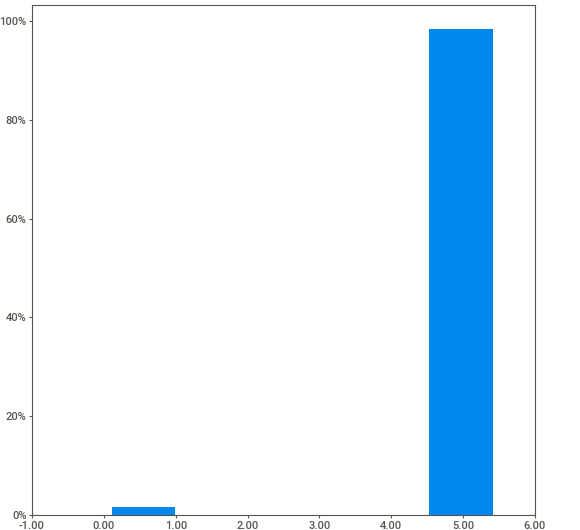
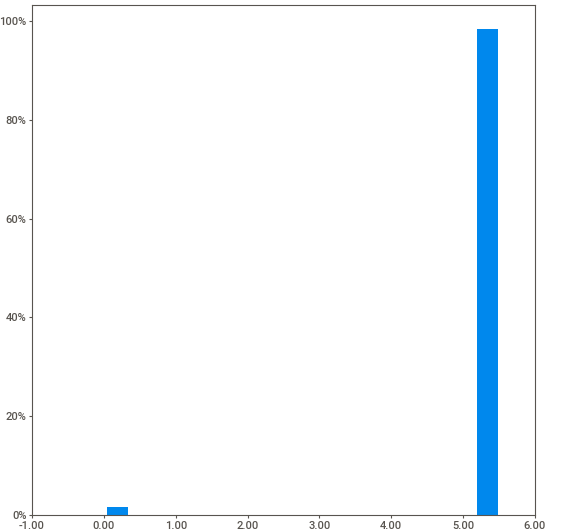
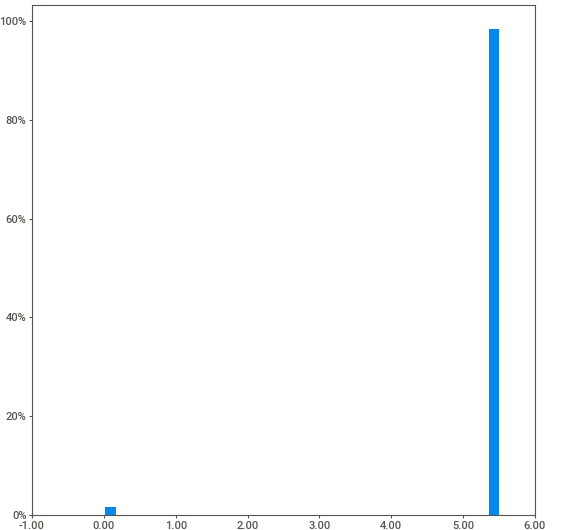
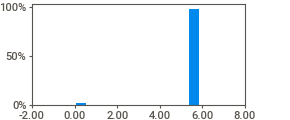
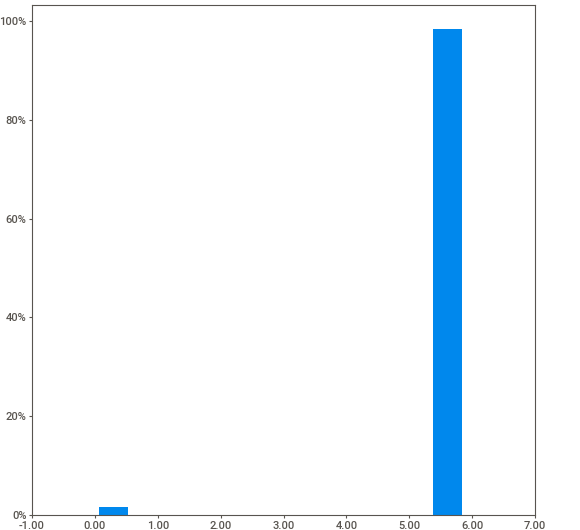
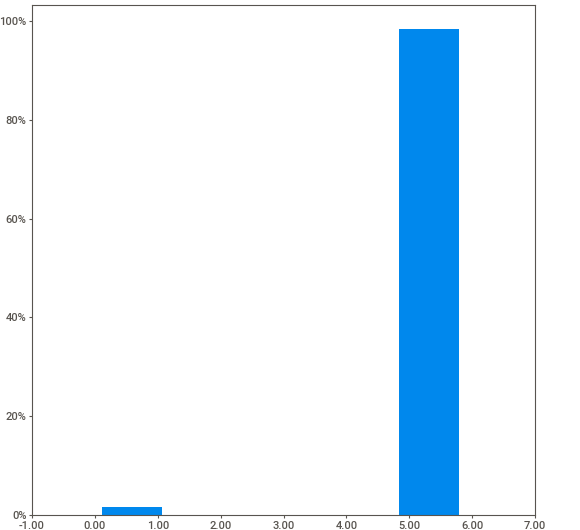
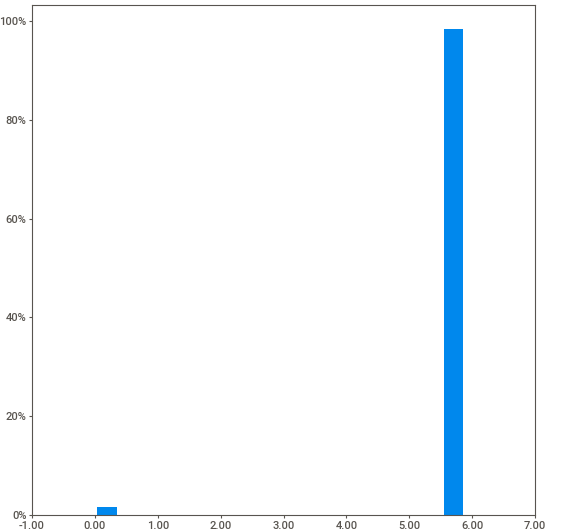
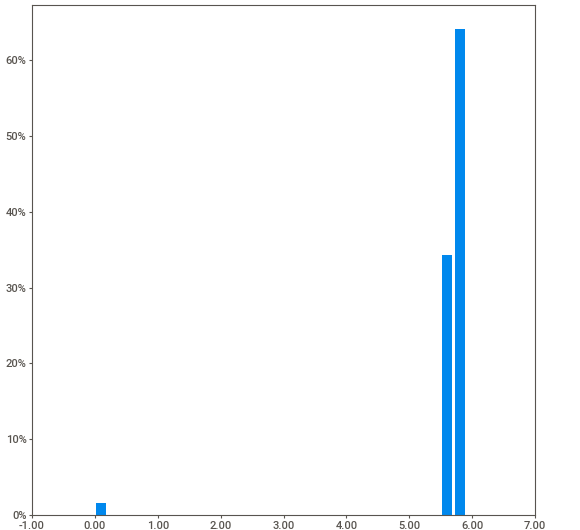
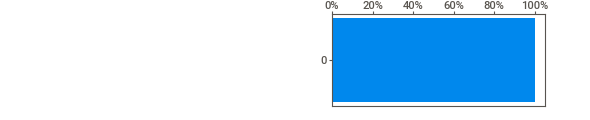
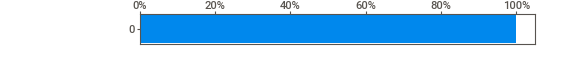
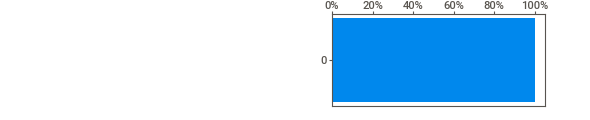
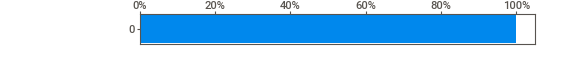
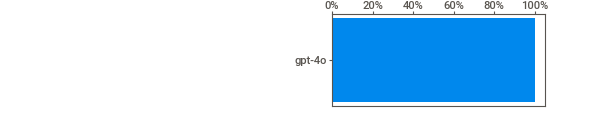
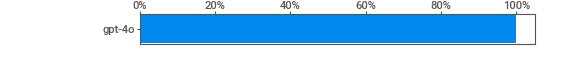
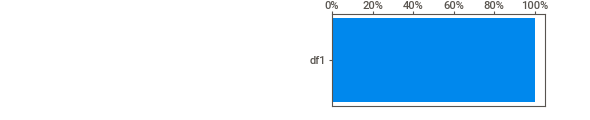
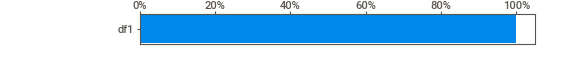
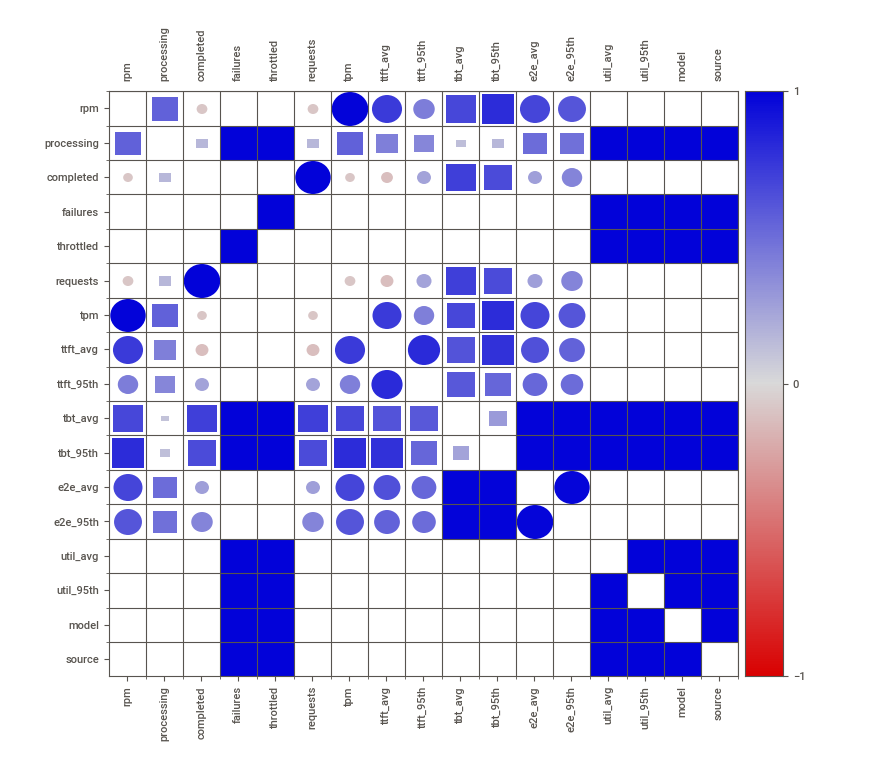
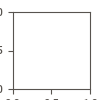

Report '/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarksgpt-4o.html' was saved to storage.


In [45]:
report1.show_notebook(
    layout='widescreen',
    filepath=HTML_FILE1,
)

In [46]:
HTML_FILE2 = os.path.join(HOME, RESULTS_DIR, f"benchmarks{MODEL2}.html")

In [47]:
report2 = sv.analyze(df2)
report2.show_html(HTML_FILE2, open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report /mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarksgpt-4-turbo-2024-04-09.html was generated.



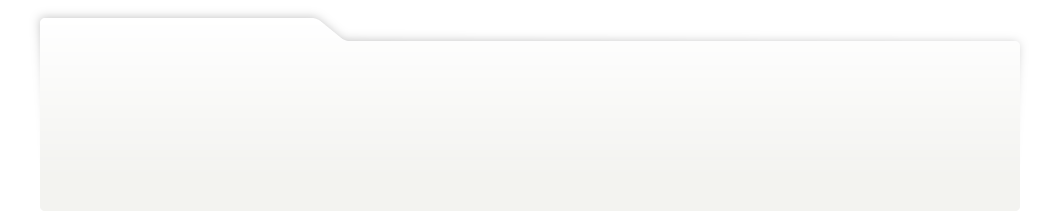
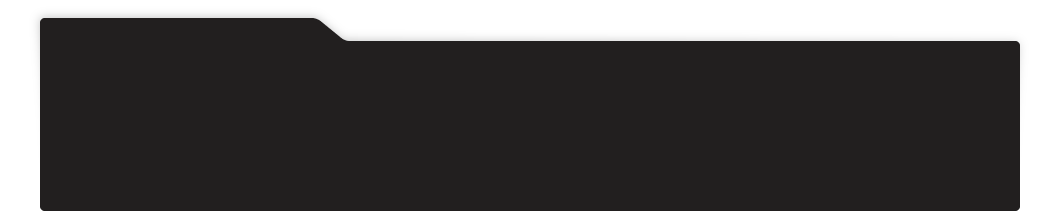
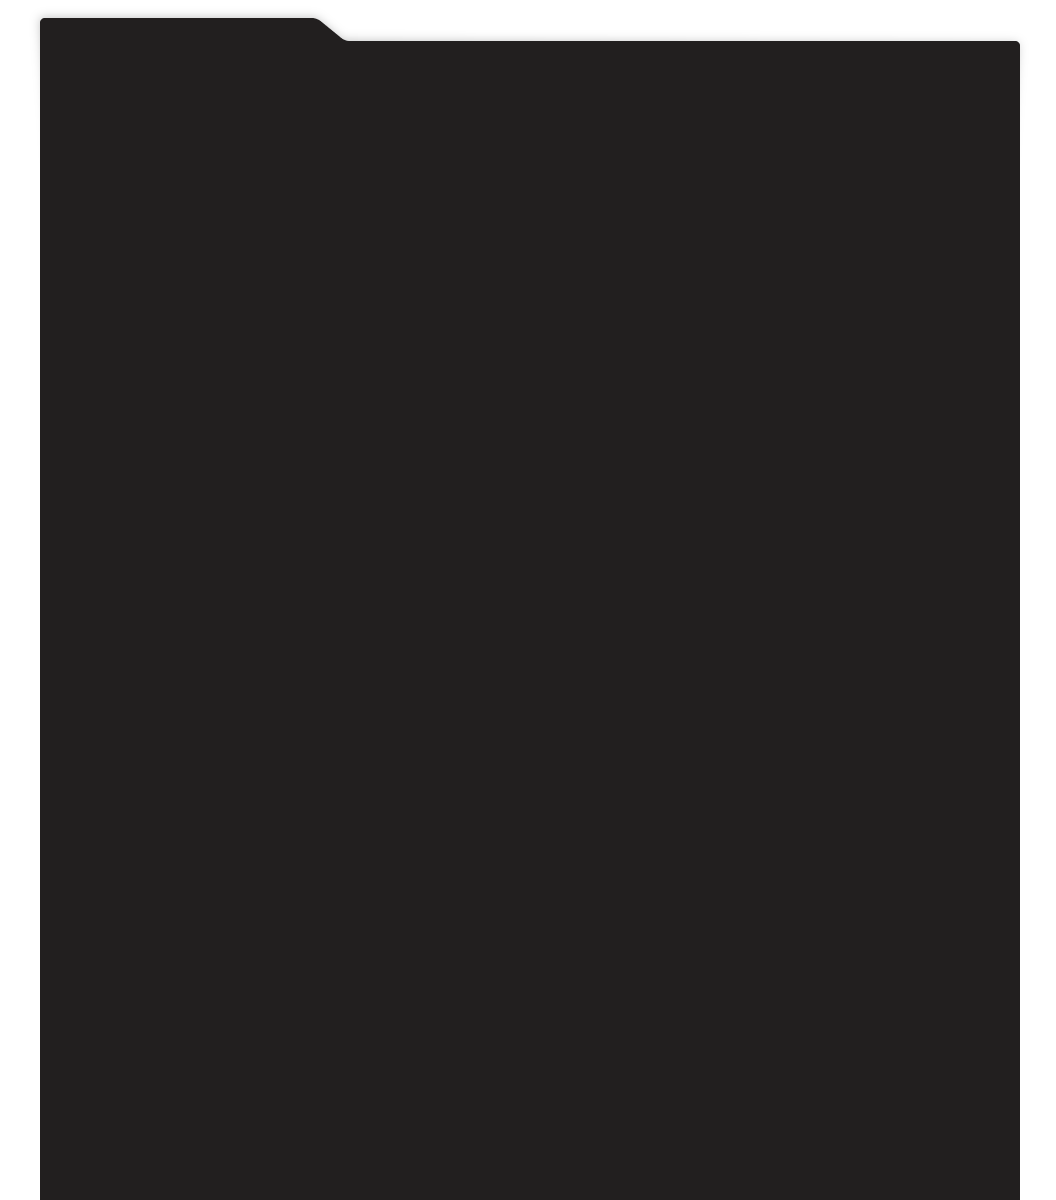
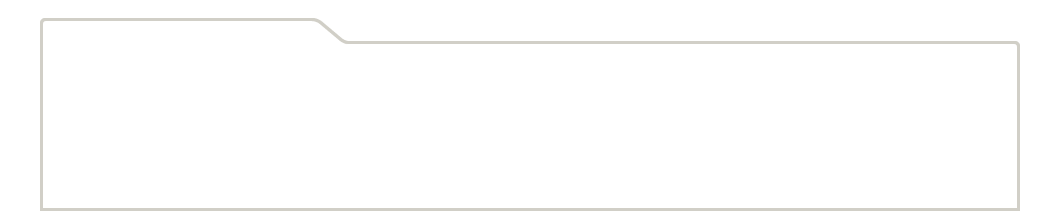
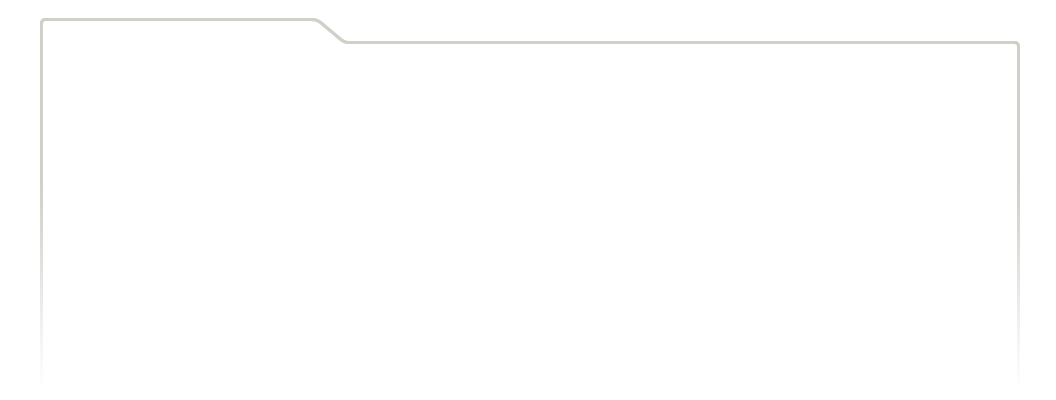
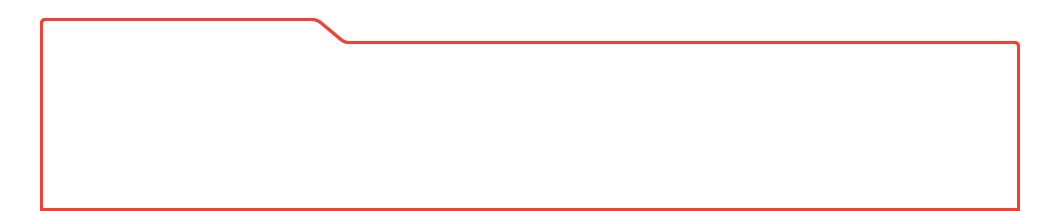
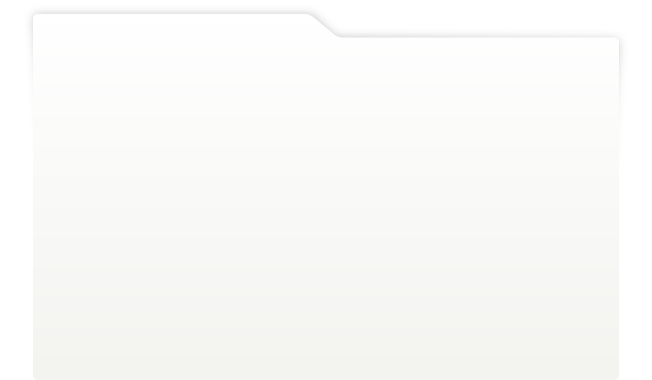
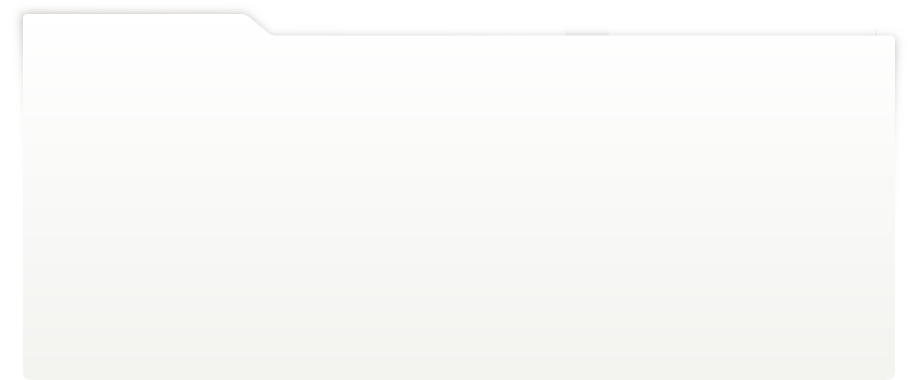
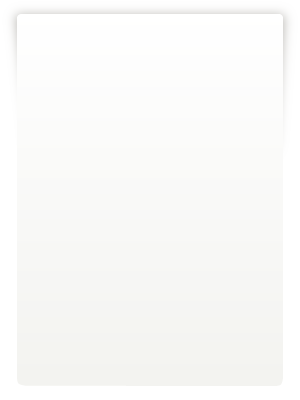
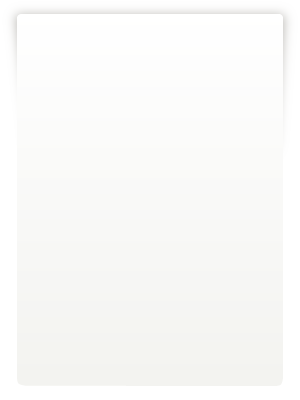
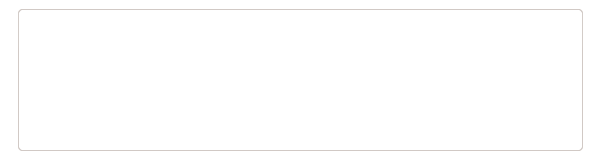
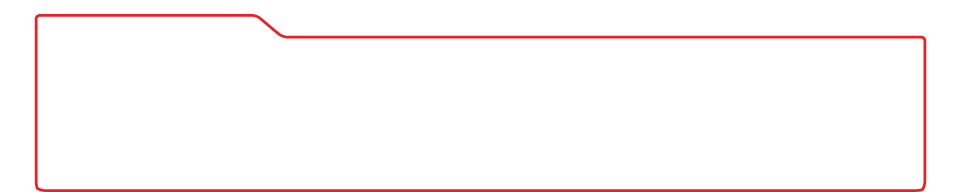
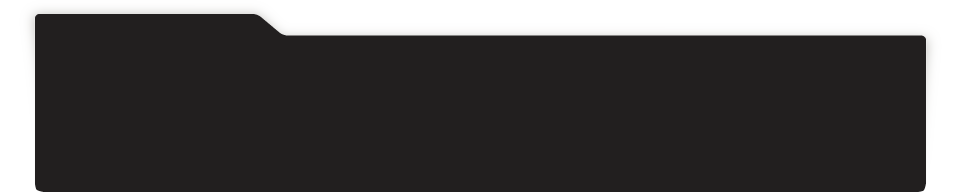
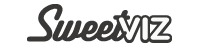
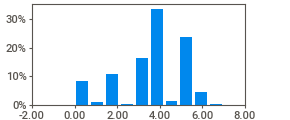
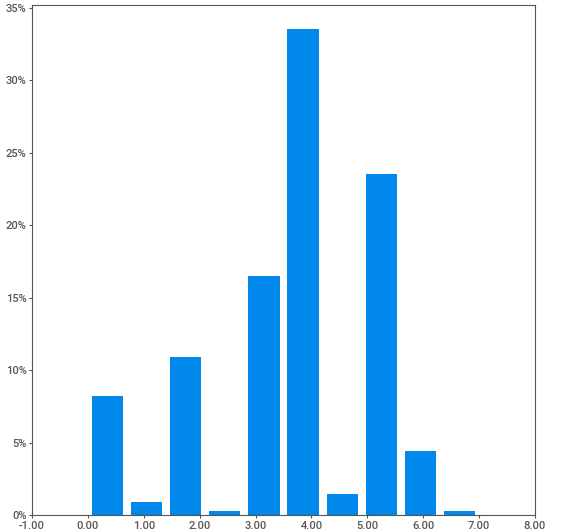
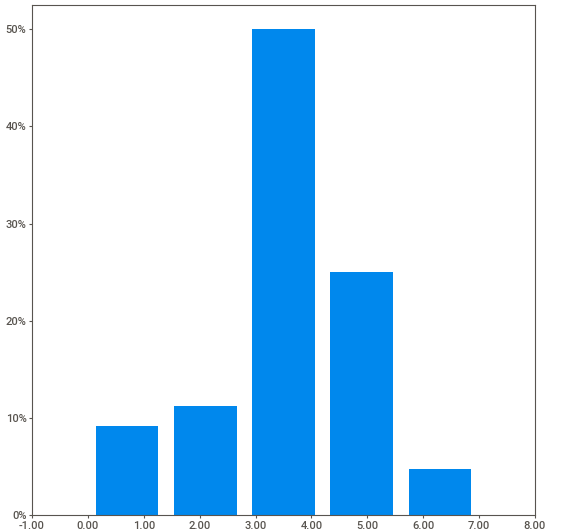
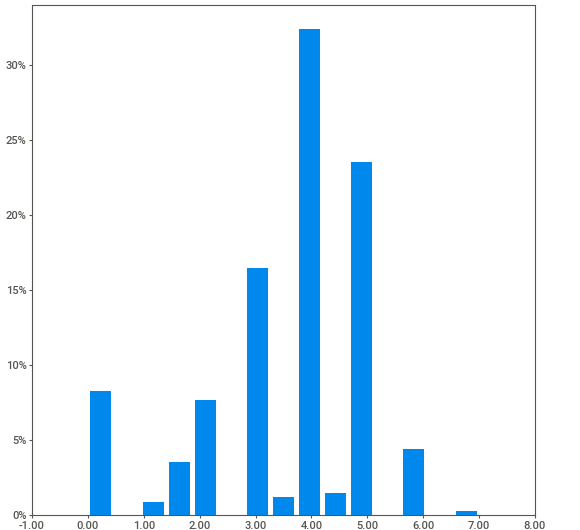
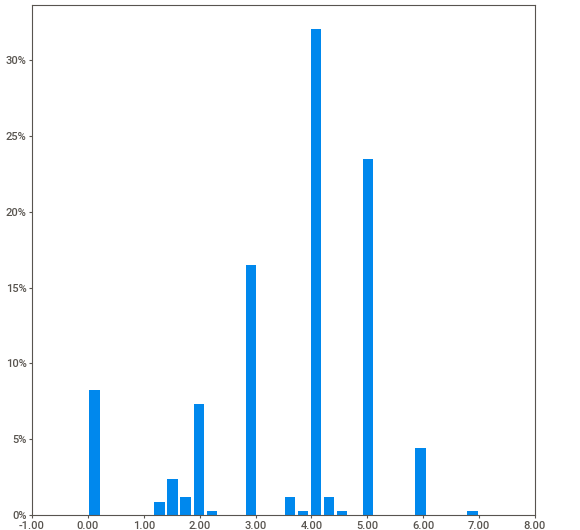
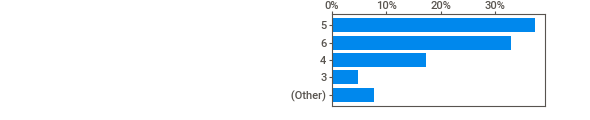
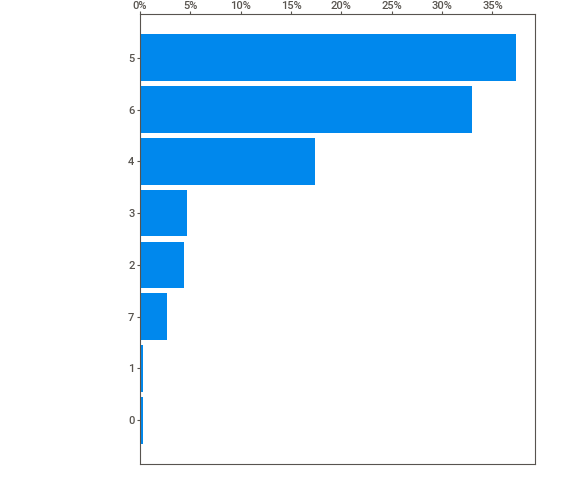
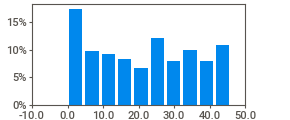
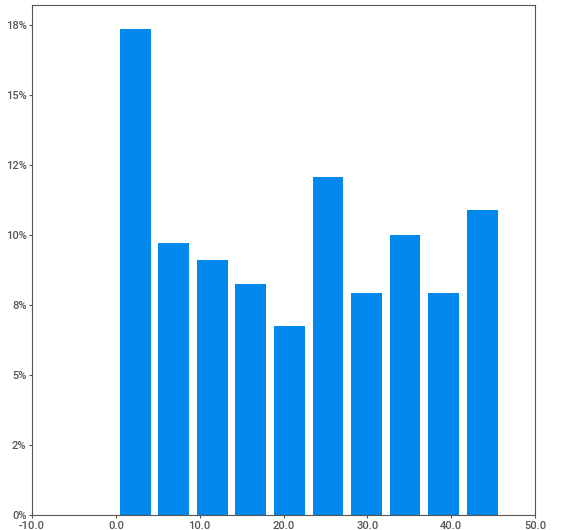
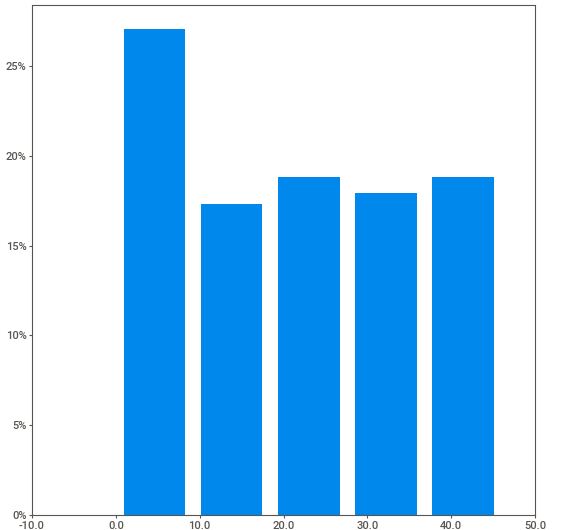
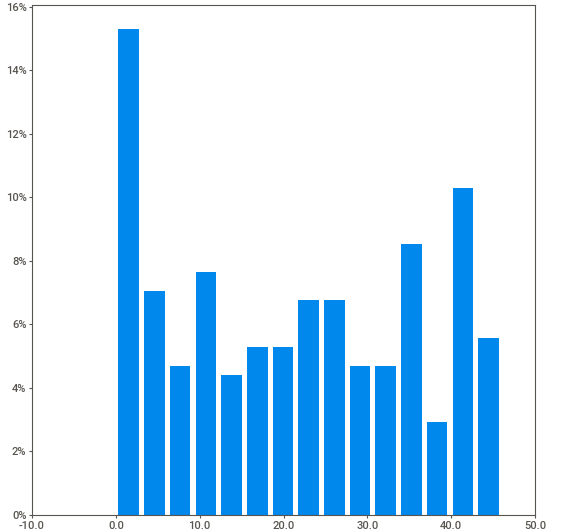
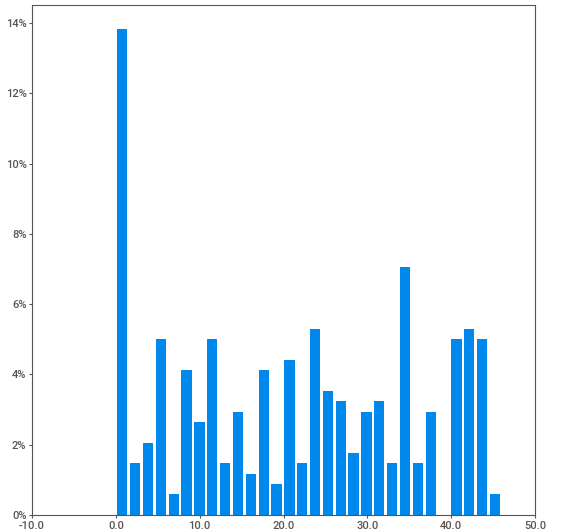
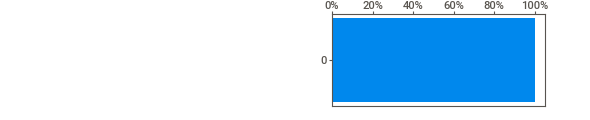
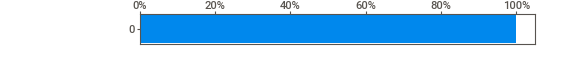
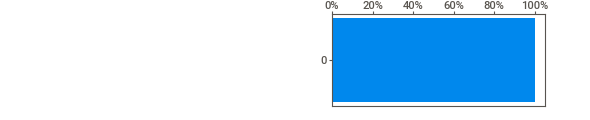
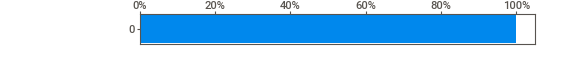
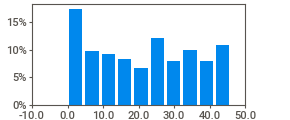
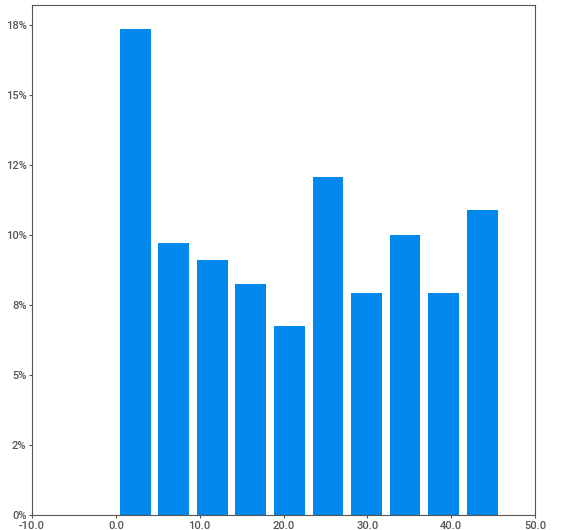
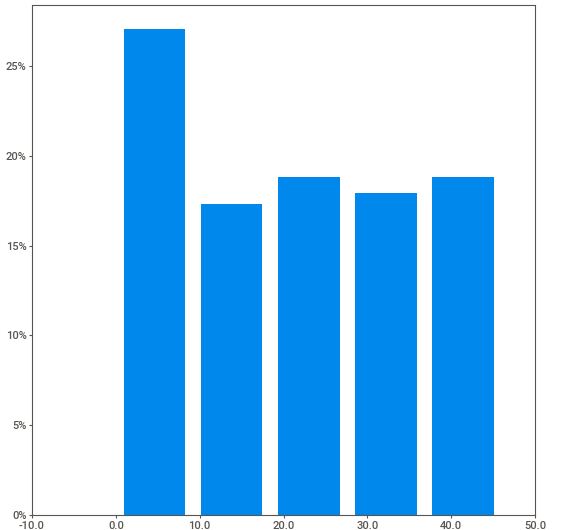
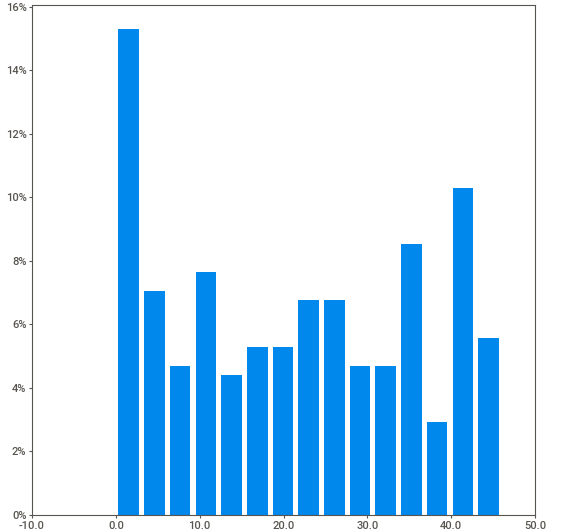
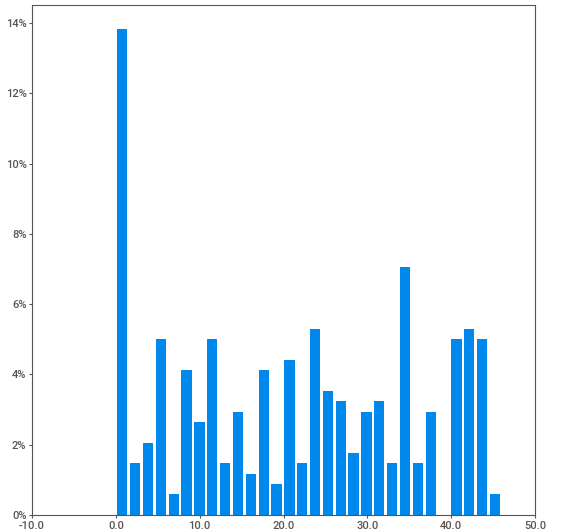
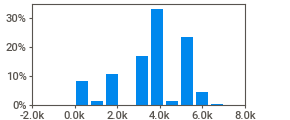
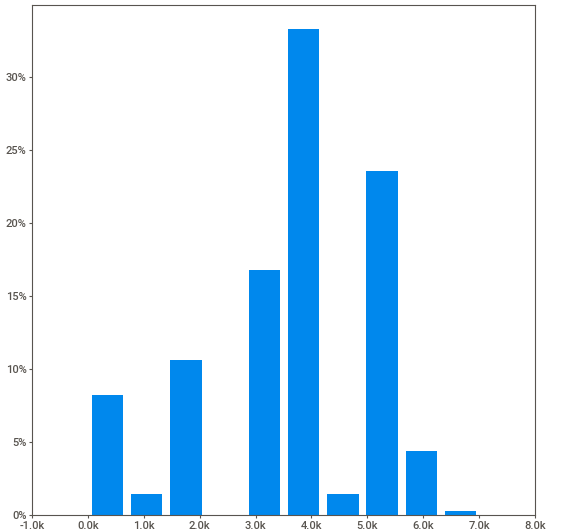
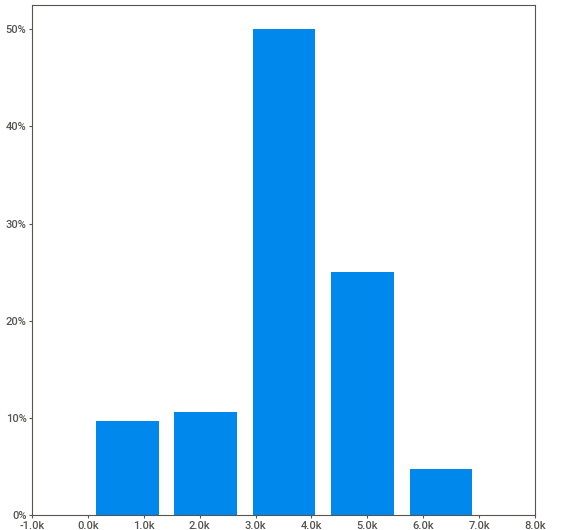
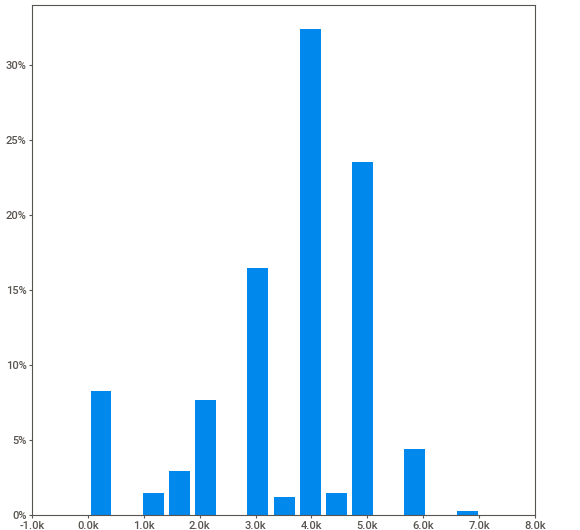
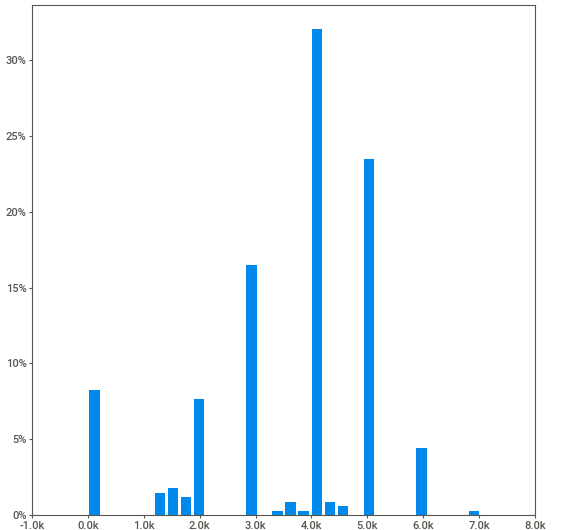
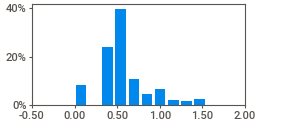
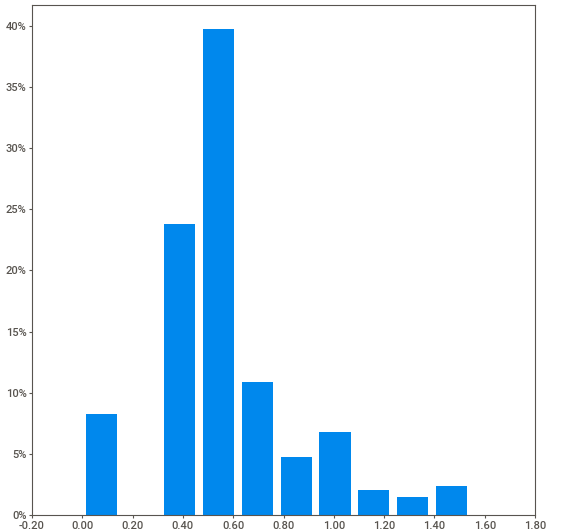
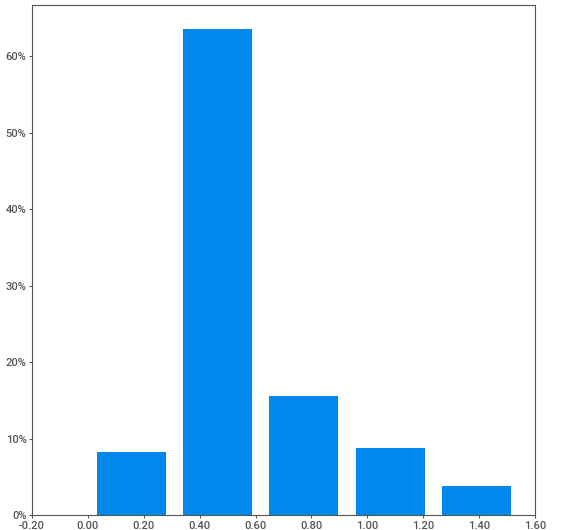
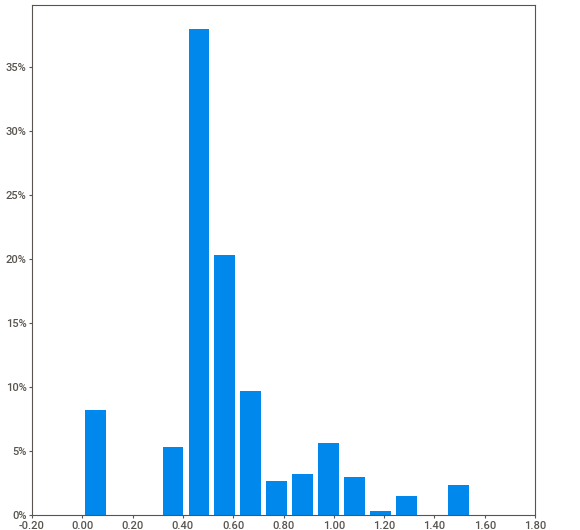
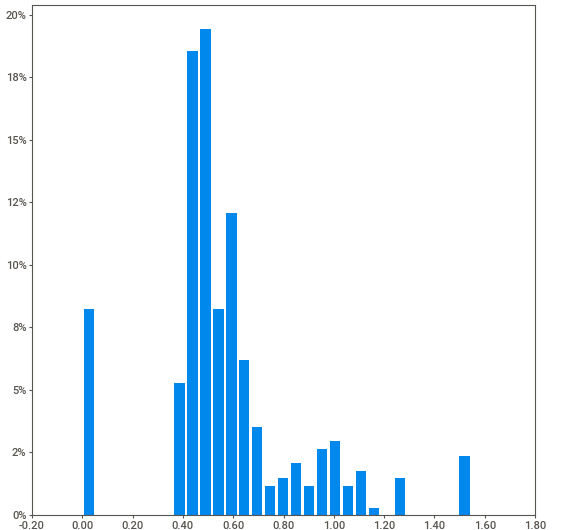
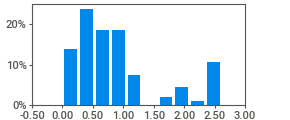
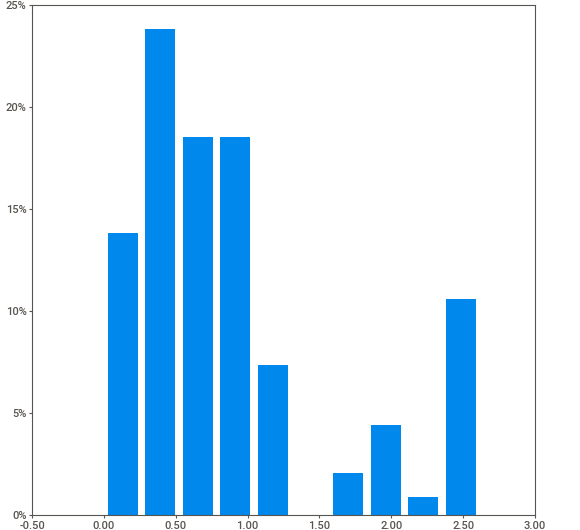
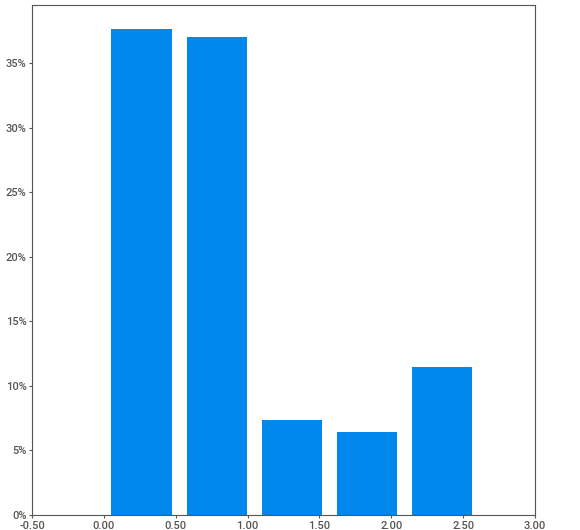
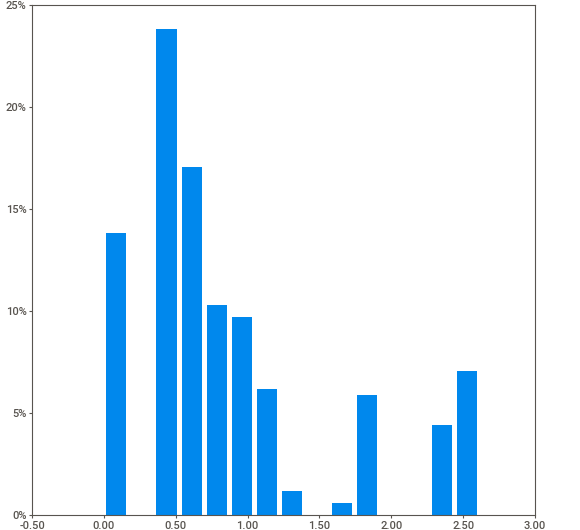
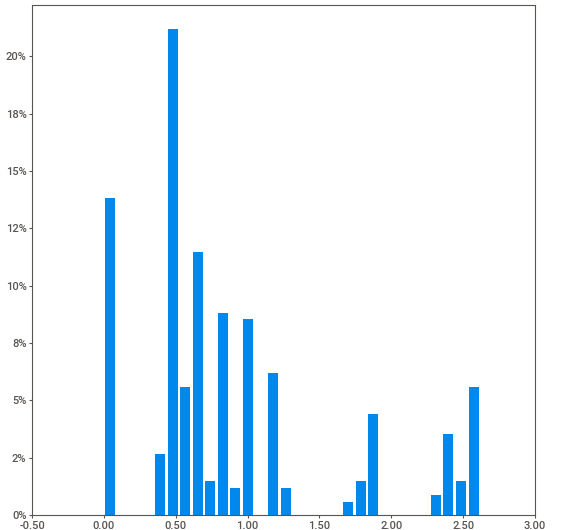
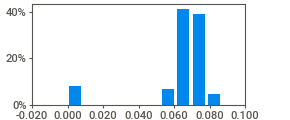
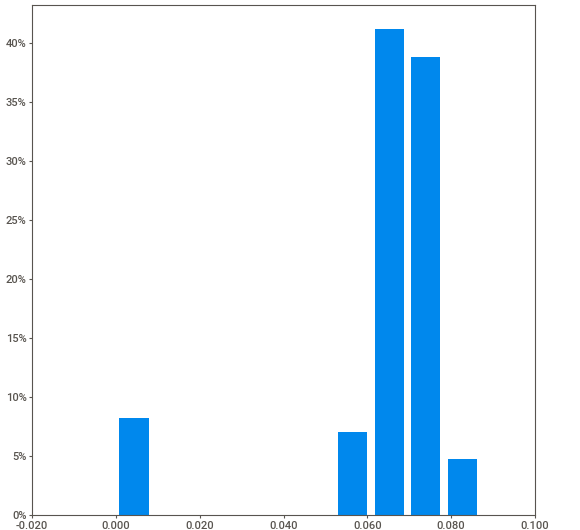
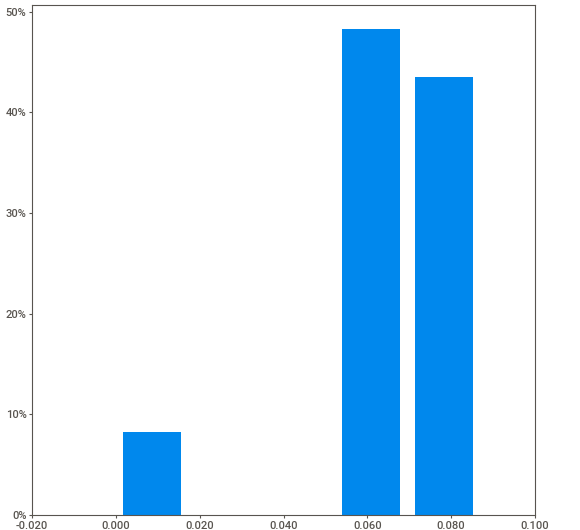
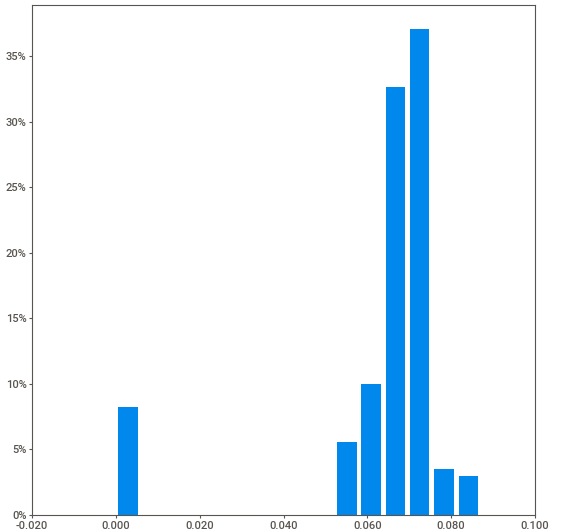
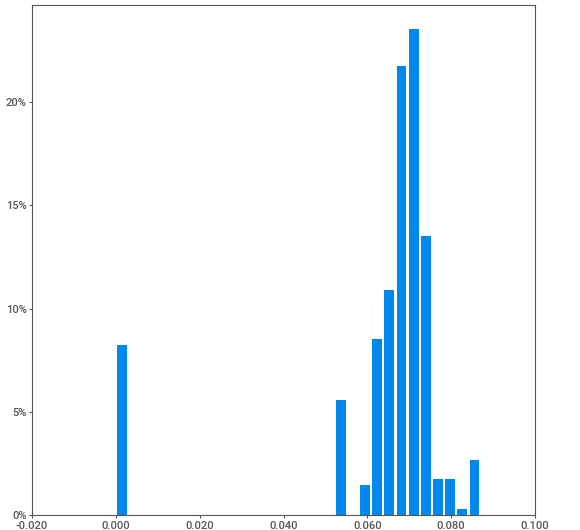
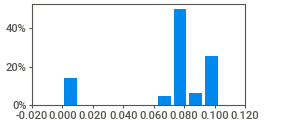
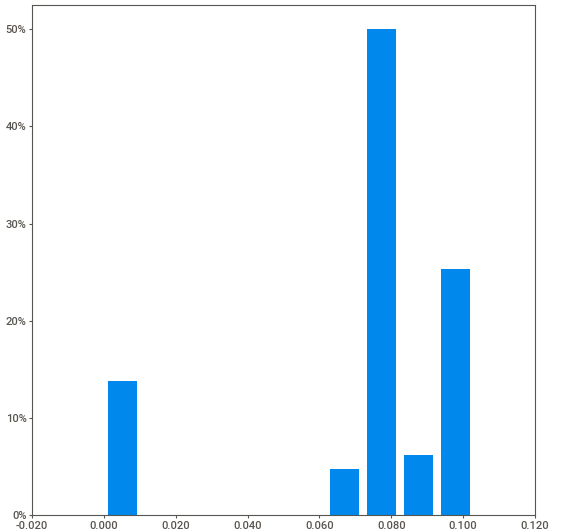
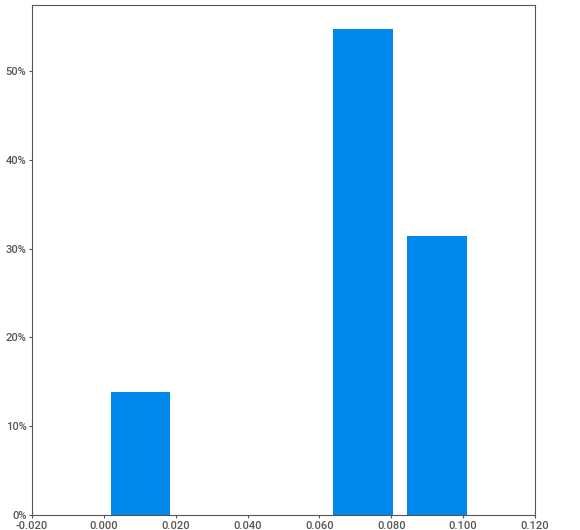
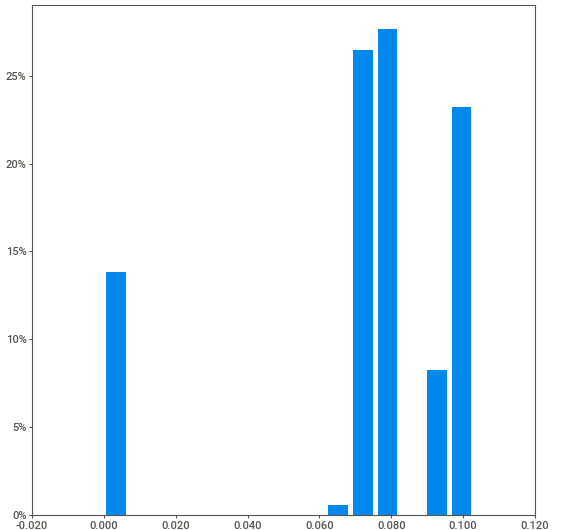
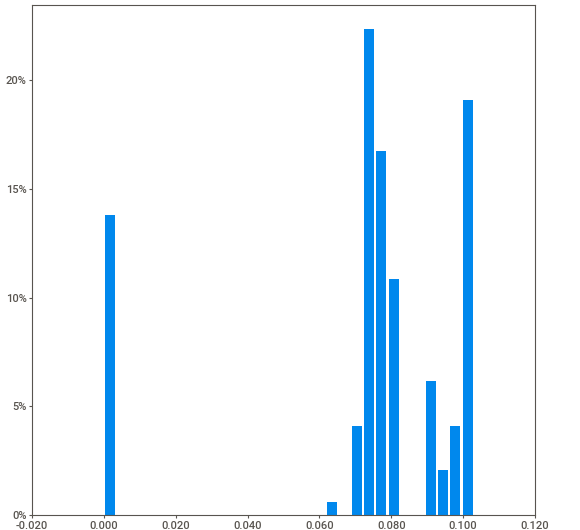
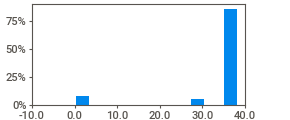
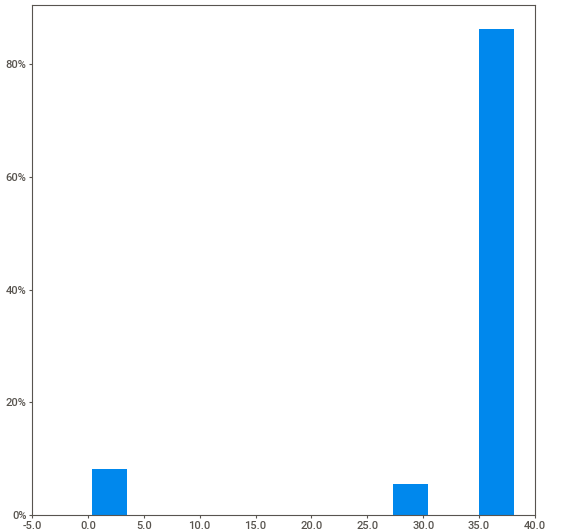
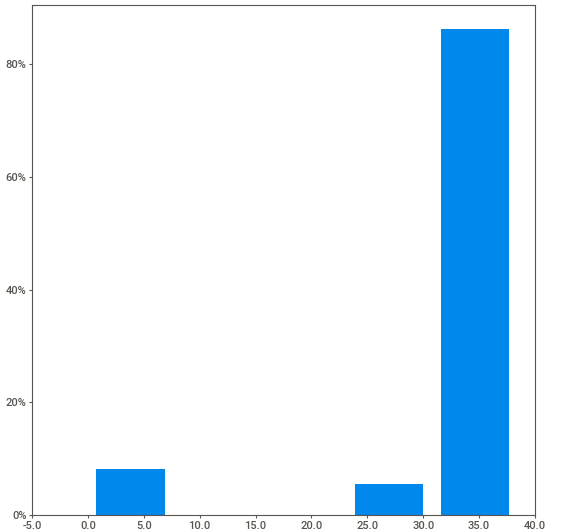
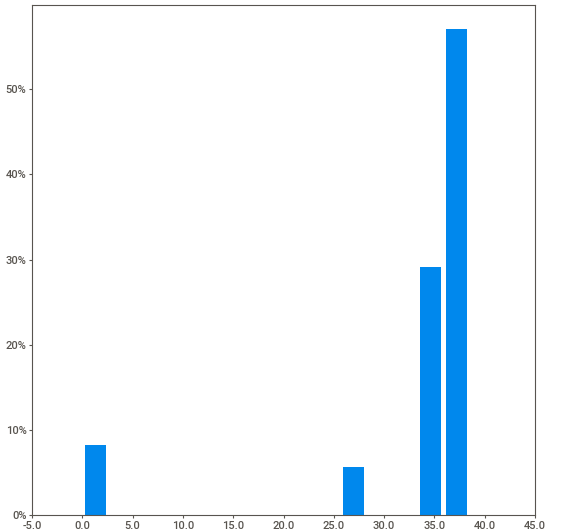
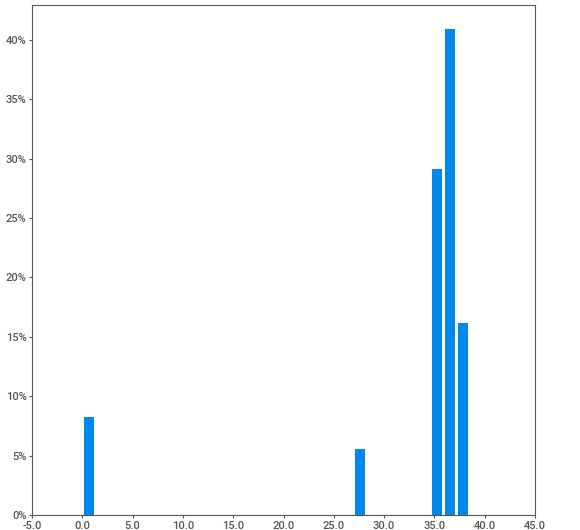
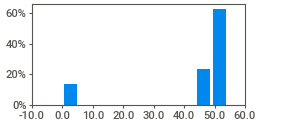
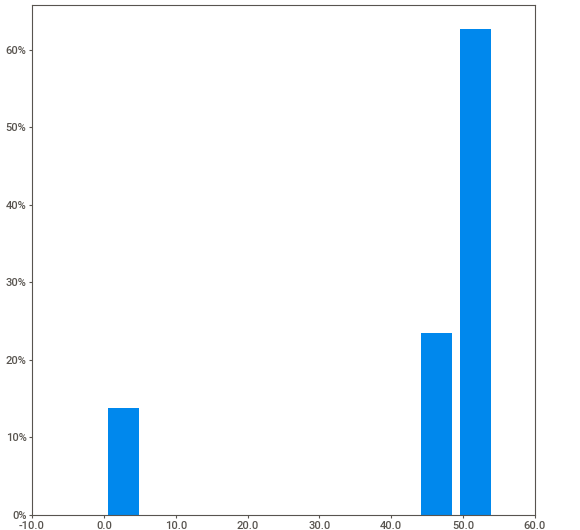
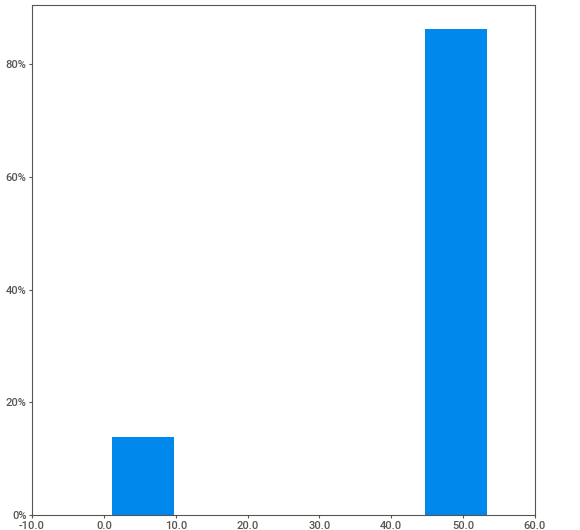
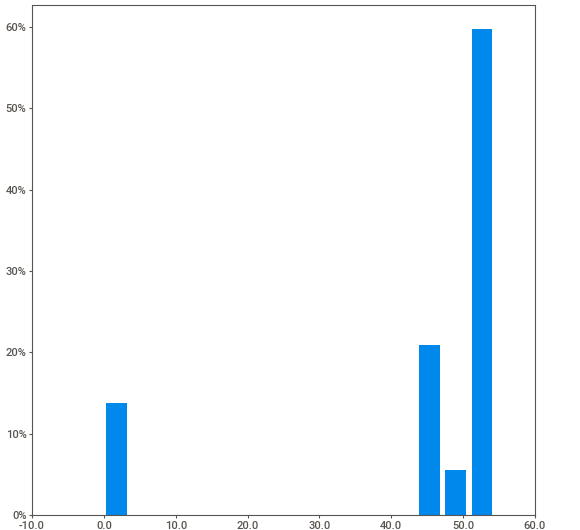
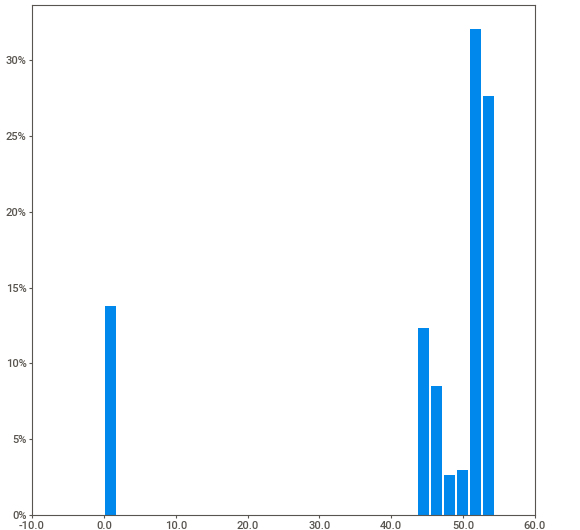
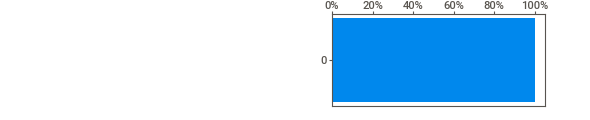
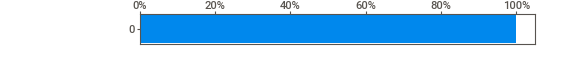
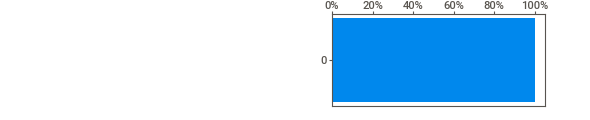
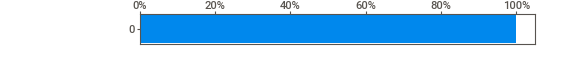
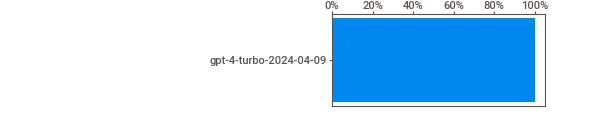
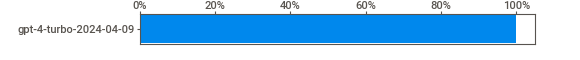
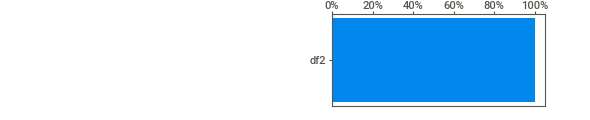
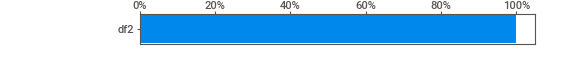
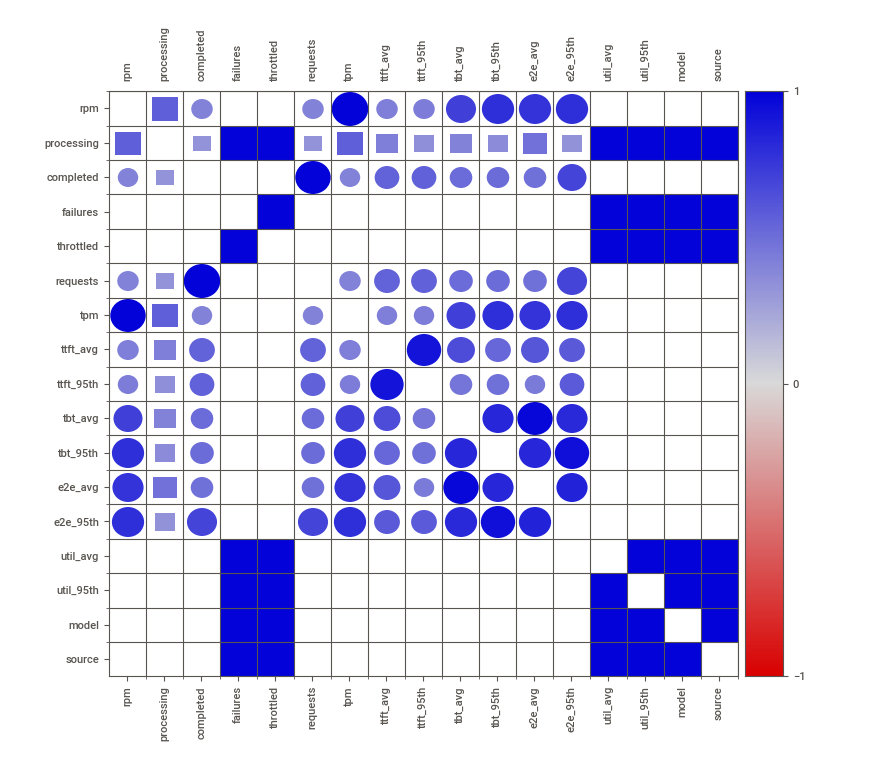
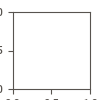

Report '/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Benchmarks/results/benchmarksgpt-4-turbo-2024-04-09.html' was saved to storage.


In [48]:
report2.show_notebook(
    layout='widescreen',
    filepath=HTML_FILE2,
)

## 8. Saved results

In [49]:
os.chdir(HOME)

In [50]:
!ls $RESULTS_DIR/*.* -lt

-rwxrwxrwx 1 root root 1468059 Jun 18 10:35 results/benchmarksgpt-4-turbo-2024-04-09.html
-rwxrwxrwx 1 root root 1343014 Jun 18 10:35 results/benchmarksgpt-4o.html
-rwxrwxrwx 1 root root   29172 Jun 18 10:35 results/benchmarksgpt-4-turbo-2024-04-09.xlsx
-rwxrwxrwx 1 root root   26636 Jun 18 10:35 results/benchmarksgpt-4o.xlsx
-rwxrwxrwx 1 root root   88400 Jun 18 10:34 results/benchmarks_gpt-4-turbo-2024-04-09.txt
-rwxrwxrwx 1 root root   79581 Jun 18 10:29 results/benchmarks_gpt-4o.txt


In [ ]:
# To delete and remove the results directory
shutil.rmtree(RESULTS_DIR)